# **Overview**
## **Latar Belakang**

Dalam rangka memastikan pencapaian target perusahaan yang optimal, **Airbnb Bangkok** baru-baru ini melakukan **Management Review** untuk mengevaluasi performa operasional sepanjang tahun **2022**. Dari hasil *review* ini, ditemukan berbagai area yang memerlukan perhatian lebih untuk mendukung pencapaian di tahun-tahun mendatang. Untuk itu, **tim Data Analyst** diamanatkan untuk melakukan **analisis mendalam** terhadap data performa 2022, guna mendapatkan **wawasan komprehensi** dari type dan preferensi pengguna.

Analisis ini diharapkan dapat membantu **tim Marketing dan Sales** dalam menyusun **strategi pemasaran** yang lebih terarah dan efektif, dengan fokus pada **peningkatan pengguna**. Sebagai upaya kolaboratif antar divisi, hasil analisis yang berbasis data ini akan menjadi **dasar dalam pengambilan keputusan yang lebih strategis**, sehingga **Airbnb Bangkok** dapat memperkuat posisinya di pasar dan menjawab **tantangan kompetitif** dalam industri perhotelan dan penyewaan properti di Thailand.

## **Rumusan Masalah**

1. Bagaimana **preferensi pengguna** berpengaruh terhadap penyewaan pada platform **Airbnb** di **Bangkok**?
   
2. Apa saja area dalam satu tahun terakhir yang mengalami **ketiadaan pembelian**?
   
3. Apa strategi **pemasaran** apa yang dapat dirumuskan berdasarkan **wawasan** dari analisis data?

## **Tujuan**

1. **Menganalisis Preferensi Pengguna**: Untuk mengidentifikasi dan memahami bagaimana **preferensi pengguna** mempengaruhi tingkat penyewaan pada platform **Airbnb** di **Bangkok**.

2. **Menilai Area Penurunan**: Untuk mengevaluasi area dalam satu tahun terakhir yang mengalami **ketiadaan pembelian**, sehingga dapat diketahui faktor-faktor penyebabnya.

3. **Merumuskan Strategi Pemasaran**: Untuk mengembangkan strategi **pemasaran** yang efektif berdasarkan **wawasan** yang diperoleh dari analisis data, guna meningkatkan performa dan daya tarik platform **Airbnb** di **Bangkok**.

## **Limitasi Project**

1.Data merupakan sample dengan range 15 December 2012 hingga 24 December 2022
1.Data berisi 15854 rows, 17 columns
1.Data yang berkaitan dengan **review** dianggap sama dengan data **transaksi** yang terjadi

## **Stakeholder di Airbnb Bangkok**

**1. Tim Marketing dan Sales Airbnb Bangkok**

**Peran:**
- Mengimplementasikan strategi pemasaran berdasarkan hasil analisis.
- Meningkatkan jumlah pengguna dan transaksi.
- Mengelola hubungan dengan host dan pengguna.

---

**2. Management Airbnb Bangkok**

**Peran:**
- Mengambil keputusan strategis berdasarkan hasil analisis.
- Menentukan arah pengembangan bisnis.
- Mengalokasikan sumber daya dan anggaran.

---

**3. Host/Pemilik Properti**

**Peran:**
- Menyediakan properti untuk disewakan.
- Mengelola dan memelihara kualitas properti.
- Berinteraksi dengan pengguna/tamu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import chi2_contingency
%matplotlib inline
from datetime import datetime
from datetime import datetime, timedelta

In [2]:
df= pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [4]:
display(df.describe().round(2), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,1.585400e+04,1.585400e+04,15854.00,15854.00,15854.00,15854.00,15854.00,10064.00,15854.00,15854.00,15854.00
mean,7926.50,1.579397e+17,1.541058e+08,13.75,100.56,3217.70,15.29,16.65,0.81,13.89,244.38,3.48
std,4576.80,2.946015e+17,1.318726e+08,0.04,0.05,24972.12,50.82,40.61,1.09,30.27,125.84,8.92
min,0.00,2.793400e+04,5.892000e+04,13.53,100.33,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,3963.25,2.104509e+07,3.974431e+07,13.72,100.53,900.00,1.00,0.00,0.12,1.00,138.00,0.00
50%,7926.50,3.503734e+07,1.224556e+08,13.74,100.56,1429.00,1.00,2.00,0.44,4.00,309.00,0.00
75%,11889.75,5.256154e+07,2.390547e+08,13.76,100.59,2429.00,7.00,13.00,1.06,13.00,360.00,3.00
max,15853.00,7.908162e+17,4.926659e+08,13.95,100.92,1100000.00,1125.00,1224.00,19.13,228.00,365.00,325.00


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [5]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [6]:
# Salin DataFrame
air_bnb = df.copy()

# Mengisi nilai NaN
air_bnb['last_review'] = air_bnb['last_review'].fillna(pd.Timestamp('1970-01-01').date())
air_bnb['reviews_per_month'] = air_bnb['reviews_per_month'].fillna(0)

# Menghapus kolom yang tidak perlu dan baris dengan nilai NaN
air_bnb = air_bnb.drop(columns='Unnamed: 0').dropna()

# Menghapus baris dengan harga <= 0
air_bnb = air_bnb[air_bnb['price'] > 0]

# Memastikan minimum_nights tidak negatif atau nol
air_bnb['minimum_nights'].min() < 1

# Menambahkan kolom total_price
air_bnb['total_price'] = air_bnb['price'] * air_bnb['minimum_nights']

# Menghapus baris dengan harga lebih dari 41,999
air_bnb = air_bnb.drop(air_bnb[air_bnb['price'] > 41999].index)

# Memeriksa hasil
air_bnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_price
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,5715
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,0.00,2,358,0,1316
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,0.00,1,365,0,48000
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,9002
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,0.00,3,365,0,1905


In [7]:
current_date = datetime(2023, 1, 1)
def calculate_join_date(row):
    # Menghitung jumlah bulan
    if row['reviews_per_month'] == 0:
        return "Newly Listed"  # Kembali "Newly Listed" jika tidak ada ulasan
    
    # Hitung jumlah bulan berdasarkan ulasan
    months = row['number_of_reviews'] / row['reviews_per_month']
    
    # Menghitung tanggal bergabung dengan perkiraan 30 hari per bulan
    join_date = current_date - timedelta(days=months * 30)
    
    return join_date.date()

# Menambahkan kolom 'join_date' ke DataFrame
air_bnb['join_date'] = air_bnb.apply(calculate_join_date, axis=1)
air_bnb['join_date'] = pd.to_datetime(air_bnb['join_date'], errors='coerce')

# Menampilkan DataFrame dengan kolom join_date
air_bnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_price,join_date
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,5715,2012-04-28
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,0.00,2,358,0,1316,NaT
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,0.00,1,365,0,48000,NaT
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,9002,2017-07-11
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,0.00,3,365,0,1905,NaT


## Proses Pembersihan Data
- Mengisi nilai NaN untuk kolom last_review dengan 1970 dan reviews_per_month 0
- Menghapus kolom Unnamed: 0, baris price yang harganya <=0, menghapus baris dengan price lebih dari 41,999
- Menambahkan kolom join_date yang berisi tanggal listing tersebut join ke Airbnb

In [8]:
air_bnb.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
total_price                          0
join_date                         5752
dtype: int64

In [9]:
# Definisikan fungsi untuk melakukan uji KS
def kolmogorov_smirnov_tests(df, columns):
    results = {}
    for column in columns:
        # Menghitung parameter normal
        mean = df[column].mean()
        std = df[column].std()
        
        # Melakukan uji KS
        ks_test = stats.kstest(df[column], 'norm', args=(mean, std))
        results[column] = {
            'Statistic': ks_test.statistic,
            'P-Value': ks_test.pvalue,
            'Normality': 'Data terdistribusi normal' if ks_test.pvalue > 0.05 else 'Data tidak terdistribusi normal'
        }
    return results

# Daftar kolom untuk diuji
columns_to_test = ['minimum_nights', 'availability_365', 'total_price']

# Melakukan uji KS
ks_results = kolmogorov_smirnov_tests(air_bnb, columns_to_test)

# Menampilkan hasil
for column, result in ks_results.items():
    print(f"Uji Kolmogorov-Smirnov untuk {column}:")
    print(f"Statistik: {result['Statistic']}, P-Value: {result['P-Value']}, Normalitas: {result['Normality']}\n")


Uji Kolmogorov-Smirnov untuk minimum_nights:
Statistik: 0.389366009195434, P-Value: 0.0, Normalitas: Data tidak terdistribusi normal

Uji Kolmogorov-Smirnov untuk availability_365:
Statistik: 0.20553977485335095, P-Value: 0.0, Normalitas: Data tidak terdistribusi normal

Uji Kolmogorov-Smirnov untuk total_price:
Statistik: 0.4656026834308652, P-Value: 0.0, Normalitas: Data tidak terdistribusi normal



In [10]:
df_tourist = pd.read_csv('tourist_arrivals_bangkok_thailand_2010_2023.csv')
df_tourist.tail()

,Year,Tourists_Thailand,Tourists_Bangkok
9,2019,39854000,25000000
10,2020,6700000,3500000
11,2021,1200000,500000
12,2022,8000000,5000000
13,2023,11000000,7000000


In [11]:
df_tourist.isna().sum()

Year                 0
Tourists_Thailand    0
Tourists_Bangkok     0
dtype: int64

> # Analyze

In [12]:
newly_listed = air_bnb[air_bnb['join_date'].isna()]
newly_listed.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_price,join_date
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,0.0,2,358,0,1316,NaT
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,0.0,1,365,0,48000,NaT
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,0.0,3,365,0,1905,NaT
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,1970-01-01,0.0,1,365,0,1461,NaT
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,1970-01-01,0.0,1,365,0,42000,NaT


In [13]:
already_listed = air_bnb[air_bnb['join_date'].notna()]
already_listed.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,total_price,join_date
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,5715,2012-04-28
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,9002,2017-07-11
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,250000,2013-10-27
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,4674,2014-10-15
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,4674,2013-11-15


# **Analyze Last Year Performance (2022)**

In [14]:
# Filtering to include only rows where 'number_of_reviews_ltm' > 0
filtered_newly_ltm = already_listed[already_listed['number_of_reviews_ltm'] > 0]

# Grouping by 'room_type'
group_room_newly = filtered_newly_ltm.groupby('room_type')
result_group_room_newly = group_room_newly['number_of_reviews_ltm'].sum().reset_index()
max_capacity_dict = {
    'Entire home/apt': 4,
    'Hotel room': 2,
    'Private room': 2,
    'Shared room': 2
}

# Create a new column 'max_capacity' using the map function
result_group_room_newly['max_capacity'] = result_group_room_newly['room_type'].map(max_capacity_dict)
result_group_room_newly['total_guest'] = result_group_room_newly['number_of_reviews_ltm'] * result_group_room_newly['max_capacity']
result_group_room_newly.rename(columns={'number_of_reviews_ltm': 'number_of_room'}, inplace=True)
# Display the result_group_room_newly
result_group_room_newly

,room_type,number_of_room,max_capacity,total_guest
0,Entire home/apt,44532,4,178128
1,Hotel room,1258,2,2516
2,Private room,9185,2,18370
3,Shared room,218,2,436


In [15]:
total_guests_room_newly_sum = result_group_room_newly['total_guest'].sum()

# Get the value from 'Tourists_Bangkok' at row index 12
tourists_bangkok_index_12 = df_tourist.loc[12, 'Tourists_Bangkok']

# Calculate the percentage
percentage = (total_guests_room_newly_sum / tourists_bangkok_index_12) * 100

# Display the result
print(f'Total Tourist in Bankok 2022: {tourists_bangkok_index_12}\nTotal Guest Airbnb: {total_guests_room_newly_sum}\nMarket Share: {percentage:.2f}%')

Total Tourist in Bankok 2022: 5000000
Total Guest Airbnb: 199450
Market Share: 3.99%


## Asumsi Jumlah Guest Tahun 2022
Total guest yang ada menggunakan airbnb **199,450 guest** dengan proporsi untuk market di bangkok adalah **3.99%**

# **Proportions of Hosts: Already Joined vs. Newly Joined**

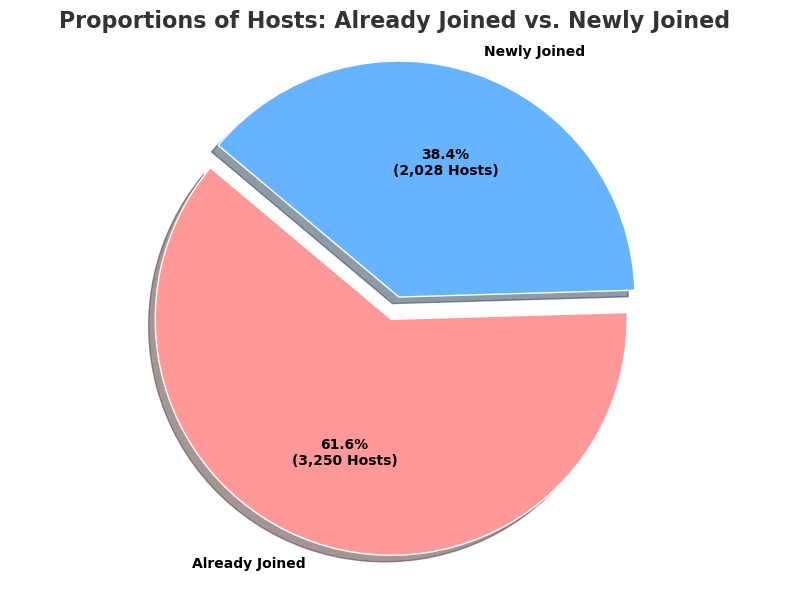

In [16]:
# Menghitung jumlah host yang sudah bergabung
joined_hosts = air_bnb[air_bnb['join_date'].notna()]['host_name'].unique()  # Ambil nama host yang sudah bergabung

# Menghitung jumlah host yang belum bergabung, setelah memfilter
not_joined_hosts_count = air_bnb[air_bnb['join_date'].isna() & ~air_bnb['host_name'].isin(joined_hosts)]['host_name'].nunique()

# Jumlah host yang sudah bergabung
joined_hosts_count = len(joined_hosts)

# Menyusun data untuk pie chart
data = [joined_hosts_count, not_joined_hosts_count]
labels = ['Already Joined', 'Newly Joined']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # "Meledakkan" irisan NaT sedikit untuk penekanan

# Membuat pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    data,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(data)):,} Hosts)',  # Menambahkan pemisah ribuan
    shadow=True,
    startangle=140,
    textprops=dict(color="black", weight='bold'),
    wedgeprops=dict(edgecolor='w')
)

# Menambahkan judul
plt.title("Proportions of Hosts: Already Joined vs. Newly Joined", fontsize=16, weight='bold', color='#333333')

# Menampilkan pie chart
plt.axis('equal')  # Menjaga aspek rasio
plt.tight_layout()
plt.show()

In [48]:
display(joined_hosts)

array(['Nuttee', 'Sirilak', 'Wimonpak', ..., 'Non', 'Lucky', 'Phatchara'],
      dtype=object)

## Interpretasi

Dari analisis data, terdapat **2,043 hosts** baru yang bergabung setelah penutupan buku pada **24 Desember 2022**. Angka ini mewakili sekitar **38.5%** dari total keseluruhan host, menunjukkan pertumbuhan yang signifikan dalam komunitas. Peningkatan jumlah host ini berpotensi memperkaya variasi listing dan meningkatkan pengalaman pengguna, serta memperluas jangkauan layanan yang tersedia.

Data ini tidak hanya mencerminkan angka, tetapi juga menandakan dinamika dan peluang pengembangan lebih lanjut dalam penyewaan properti.


# **Proporsi Newly Listed dan Already Listed**

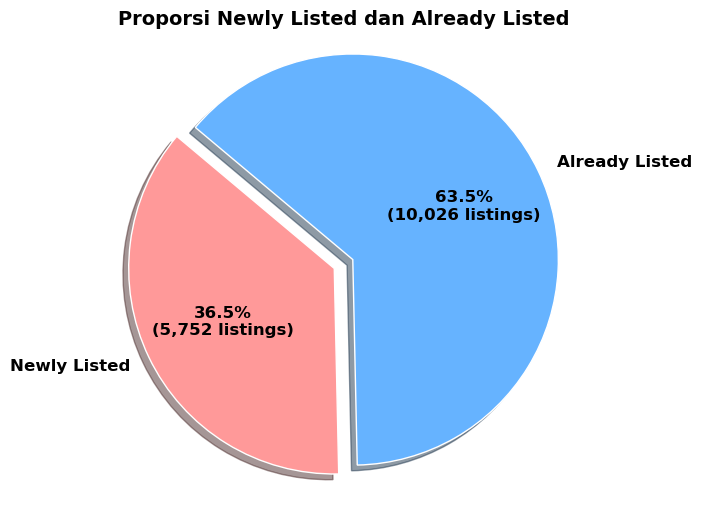

In [17]:
import matplotlib.pyplot as plt

# Menghitung jumlah NaT dan tidak NaT
nat_count = air_bnb['join_date'].isna().sum()
not_nat_count = air_bnb['join_date'].notna().sum()

# Menyiapkan data untuk pie chart
labels = ['Newly Listed', 'Already Listed']
sizes = [nat_count, not_nat_count]
colors = ['#ff9999', '#66b3ff']  # Warna untuk pie chart
explode = (0.1, 0)  # "Meledakkan" irisan NaT sedikit untuk penekanan

# Membuat pie chart dengan format persentase dan jumlah
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(sizes)):,} listings)',  # Menambahkan pemisah ribuan
    shadow=True,
    startangle=140,
    textprops=dict(color="black", weight='bold'),
    wedgeprops=dict(edgecolor='w')
)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Proporsi Newly Listed dan Already Listed', fontsize=14, weight='bold')

# Styling text pada pie chart
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()


## Interpretasi

Dalam konteks jumlah listing yang tersedia, terdapat **5,783 listings** yang tercatat, yang mewakili **36.5%** dari total keseluruhan listings di **Airbnb Bangkok**. Angka ini menunjukkan potensi keuntungan yang signifikan bagi perusahaan, mengingat tingginya permintaan untuk akomodasi di kawasan ini. 

Namun, penting untuk melakukan analisis lebih mendalam terhadap proporsi **Already Listed** guna mengevaluasi performa dan keuntungan dari setiap listing. Pemahaman yang lebih baik mengenai kinerja ini akan membantu dalam merumuskan strategi yang lebih efektif untuk meningkatkan daya tarik dan profitabilitas platform.

# **Proporsi Listing Lama dengan Review dan Tanpa Review**

In [18]:
# Total listing dalam kategori already listed yang memiliki review LTM
already_listed_ltm = already_listed[already_listed['number_of_reviews_ltm'] > 0]
total_already_ltm = len(already_listed[already_listed['number_of_reviews_ltm'] > 0])

# Total listing dalam kategori already listed yang tidak memiliki review LTM
already_listed_no_ltm = already_listed[already_listed['number_of_reviews_ltm'] == 0]
total_already_no_ltm = len(already_listed[already_listed['number_of_reviews_ltm'] == 0])

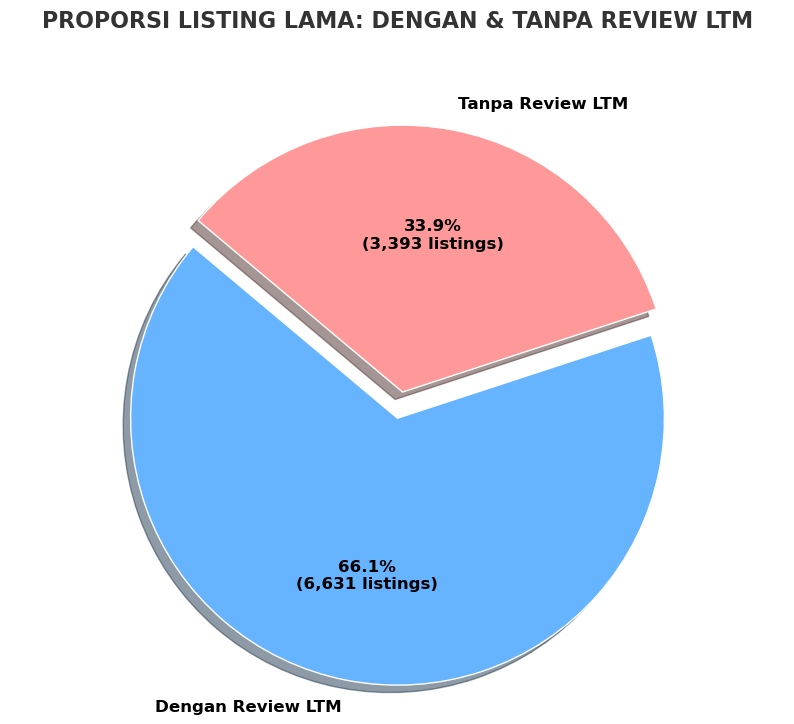

In [19]:
import matplotlib.pyplot as plt

# Menyusun data label, warna, dan nilai untuk pie chart
labels = ['Dengan Review LTM', 'Tanpa Review LTM']
data = [total_already_ltm, total_already_no_ltm]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Menyoroti bagian 'Dengan Review LTM'

# Membuat pie chart dengan format persentase dan nilai absolut
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    data,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(data)):,} listings)',  # Menambahkan pemisah ribuan
    shadow=True,
    startangle=140,
    textprops=dict(color="black", weight='bold'),
    wedgeprops=dict(edgecolor='w')
)

# Menambahkan judul dengan penyesuaian dan mengangkatnya
plt.title("PROPORSI LISTING LAMA: DENGAN & TANPA REVIEW LTM", fontsize=16, weight='bold', color='#333333', y=1.1)

# Styling text pada pie chart
for text in texts + autotexts:
    text.set_fontsize(12)

plt.axis('equal')  # Membuat pie chart berbentuk bulat
plt.show()


## Interpretasi

Pada tahun 2022, data menunjukkan bahwa **33,9%** dari total listing, yang setara dengan **3.393 listing**, tidak mengalami **transaksi**. Hal ini tercermin dari minimnya **review** yang diberikan, yang menandakan adanya **potensi pasar** yang belum tergali. 

Keberadaan listing yang tidak aktif ini memberikan indikasi adanya **peluang** yang signifikan untuk pengembangan **strategi pemasaran** yang lebih efektif dan menarik. Dengan melakukan analisis mendalam terhadap faktor-faktor yang mempengaruhi kurangnya transaksi, perusahaan dapat merumuskan langkah-langkah yang tepat untuk meningkatkan **partisipasi** dan **keterlibatan** dalam pasar ini.


# **Proporsi Listing Tanpa Review per Neighborhood (Top 5 dan Kategori 'Others')**

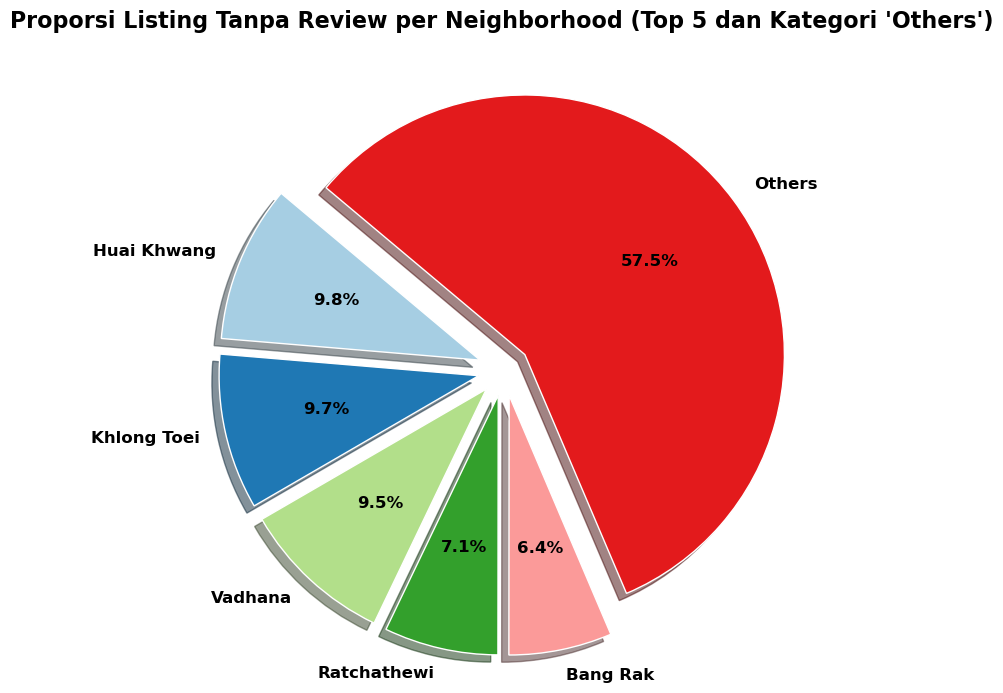

In [20]:
# 2. Mengelompokkan data berdasarkan lokasi (neighbourhood)
location_already_no_ltm = already_listed_no_ltm['neighbourhood']
count_location_already_no_ltm = location_already_no_ltm.value_counts()  # Hitung jumlah di setiap neighborhood

# 3. Mendapatkan top 5 neighborhood
top_5_locations_already_no_ltm = count_location_already_no_ltm.nlargest(5)  # Ambil 5 teratas

# 4. Menghitung sisa listing yang tidak termasuk dalam top 5
others_count = count_location_already_no_ltm.sum() - top_5_locations_already_no_ltm.sum()  # Total neighborhood yang tidak termasuk dalam top 5

# 5. Menyusun data untuk pie chart
labels = top_5_locations_already_no_ltm.index.tolist()
if others_count > 0:
    labels.append('Others')  # Tambahkan label "Others"
    sizes = top_5_locations_already_no_ltm.values.tolist() + [others_count]
else:
    sizes = top_5_locations_already_no_ltm.values.tolist()  # Hanya neighborhood yang memenuhi syarat

# 6. Menentukan explode untuk memberikan efek jarak
explode = [0.1] * len(labels)  # Menggunakan efek explode pada semua bagian

colors = plt.cm.Paired(range(len(labels)))  # Menggunakan colormap untuk warna yang berbeda

# 7. Membuat pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%',  # Menampilkan hanya persentase
    shadow=True,  # Menambahkan bayangan
    startangle=140,
    textprops=dict(color="black", weight='bold'),
    wedgeprops=dict(edgecolor='w'),
    explode=explode  # Menambahkan efek explode
)

# Menambahkan judul
plt.title("Proporsi Listing Tanpa Review per Neighborhood (Top 5 dan Kategori 'Others')", fontsize=16, weight='bold', y=1.05)

# Styling text pada pie chart
for text in texts + autotexts:
    text.set_fontsize(12)

plt.axis('equal')  # Membuat pie chart berbentuk bulat
plt.show()


## Interpretasi

Dalam analisis tahun 2022, ditemukan **proporsi** dari listing yang tidak memiliki **review**. **Top 5 Neighborhoods** dengan persentase di atas **5%** adalah sebagai berikut:

1. **Huai Khwang**
1. **Khlong Toei**
1. **Vadhana**
1. **Ratchatewi**
1. **Bang Rak**

Temuan ini menyoroti perhatian penting bagi perusahaan, karena listing tanpa review dapat mengindikasikan **kurangnya transaksi**. Upaya untuk meningkatkan **penjualan** di area-area ini sangat penting demi meraih **keuntungan yang lebih tinggi** dan memastikan **pertumbuhan yang berkelanjutan** bagi perusahaan. Dengan meningkatkan **strategi pemasaran** dan **promosi**, perusahaan dapat memanfaatkan potensi yang ada dan meningkatkan **keterlibatan** di pasar.

# **Persebaran Tipe Ruangan di Top 5 Neighborhood Tanpa Review**

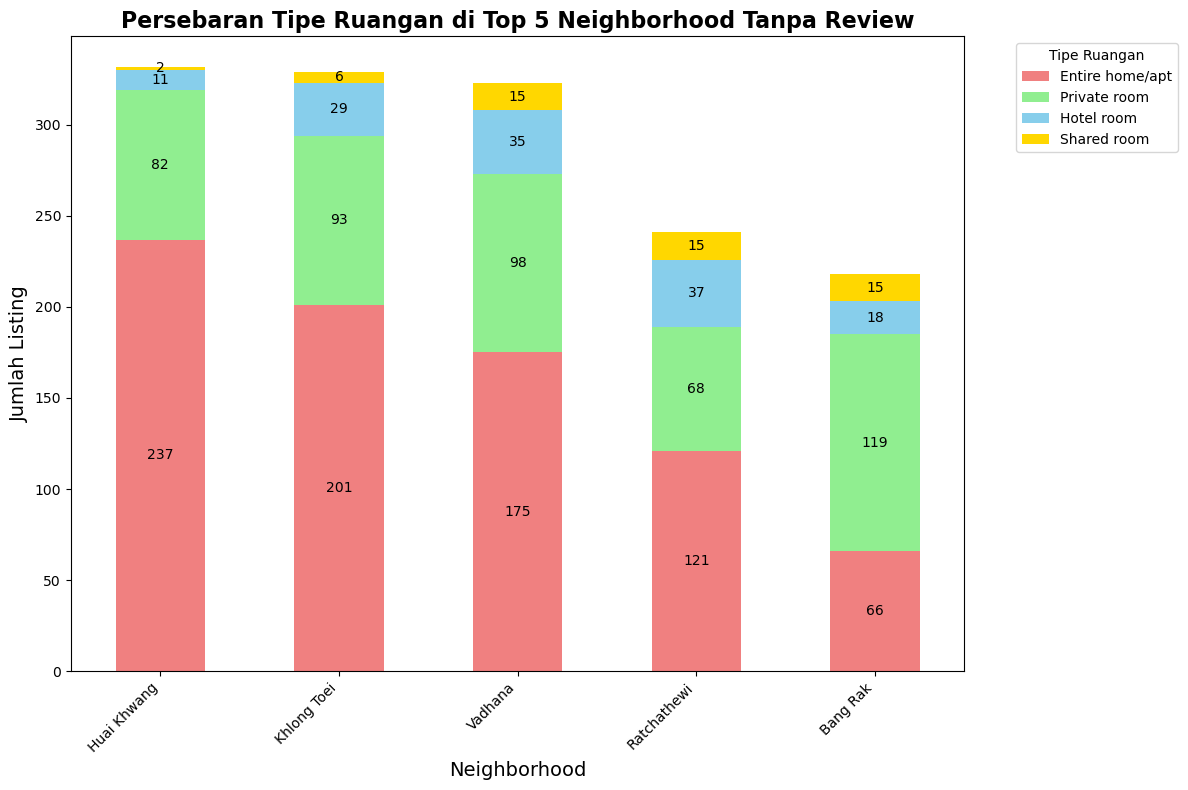

In [21]:
import matplotlib.pyplot as plt

# Mendefinisikan top 5 neighborhood
top_5_locations_already_no_ltm_list = top_5_locations_already_no_ltm.index.tolist()

# Memfilter data berdasarkan neighborhood top 5
top_5_locations_already_no_ltm = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'].isin(top_5_locations_already_no_ltm_list)]

# Menghitung jumlah setiap tipe ruangan per neighborhood
count_top_5_already_no_ltm_room_type = top_5_locations_already_no_ltm.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Mengurutkan room types berdasarkan totalnya secara menurun untuk plot
room_type_order = count_top_5_already_no_ltm_room_type.sum(axis=0).sort_values(ascending=False).index
count_top_5_already_no_ltm_room_type = count_top_5_already_no_ltm_room_type[room_type_order]

# Mengurutkan neighborhood berdasarkan jumlah totalnya secara menurun
count_top_5_already_no_ltm_room_type = count_top_5_already_no_ltm_room_type.loc[count_top_5_already_no_ltm_room_type.sum(axis=1).sort_values(ascending=False).index]

# Membuat stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
count_top_5_already_no_ltm_room_type.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'lightgreen', 'skyblue', 'gold', 'salmon'])

# Menambahkan label angka pada setiap bagian batang
for i, neighbourhood in enumerate(count_top_5_already_no_ltm_room_type.index):
    cumulative_height = 0
    for room_type in count_top_5_already_no_ltm_room_type.columns:
        count = count_top_5_already_no_ltm_room_type.loc[neighbourhood, room_type]
        if count > 0:
            ax.text(
                i, cumulative_height + count / 2,  # Menempatkan label di tengah bagian batang
                str(count), ha='center', va='center', fontsize=10, color='black'
            )
            cumulative_height += count

# Menambahkan judul dan label sumbu
plt.title('Persebaran Tipe Ruangan di Top 5 Neighborhood Tanpa Review', fontsize=16, weight='bold')
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Jumlah Listing', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Menyusun ulang legend berdasarkan urutan total terbesar
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(count_top_5_already_no_ltm_room_type.sum().values, handles, labels), reverse=True)
sorted_handles, sorted_labels = zip(*[(handle, label) for _, handle, label in sorted_handles_labels])

ax.legend(sorted_handles, sorted_labels, title='Tipe Ruangan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot dengan layout yang lebih baik
plt.tight_layout()
plt.show()

## Interpretasi

Dari **Top 5 Neighborhoods** untuk listing yang tidak memiliki **review** di tahun 2022, terlihat bahwa jenis kamar **Entire Home/Apt** memiliki proporsi terbesar di kawasan berikut:

1. **Huai Khwang**
1. **Khlong Toei**
1. **Vadhana**
1. **Ratchatewi**

Sementara itu, di **Bang Rak**, jenis kamar yang mendominasi adalah **Private Room**. 

Temuan ini memberikan **wawasan penting** mengenai **preferensi konsumen** di masing-masing neighborhood, yang dapat dijadikan dasar untuk **strategi pemasaran** yang efektif. Memahami jenis kamar yang paling diminati di setiap daerah memungkinkan perusahaan untuk menyusun penawaran yang lebih sesuai dengan keinginan pasar, serta meningkatkan **peluang transaksi**.

In [22]:
khlongtoei_already_listed_no_ltm_data = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'] == 'Khlong Toei']
huaikhwang_already_listed_no_ltm_data = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'] == 'Huai Khwang']
vadhana_already_listed_no_ltm_data = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'] == 'Vadhana']
ratchathewi_already_listed_no_ltm_data = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'] == 'Ratchathewi']
bangrak_already_listed_no_ltm_data = already_listed_no_ltm[already_listed_no_ltm['neighbourhood'] == 'Bang Rak']

In [23]:
khlongtoei_already_listed_no_ltm_data[['total_price','minimum_nights','availability_365']].describe().round(1)

,total_price,minimum_nights,availability_365
count,329.0,329.0,329.0
mean,44230.1,27.3,211.0
std,130815.1,61.4,142.3
min,350.0,1.0,0.0
25%,1900.0,1.0,82.0
50%,6413.0,2.0,218.0
75%,29176.0,28.0,358.0
max,1530000.0,370.0,365.0


In [24]:
huaikhwang_already_listed_no_ltm_data[['total_price','minimum_nights','availability_365']].describe().round(1)

,total_price,minimum_nights,availability_365
count,332.0,332.0,332.0
mean,27511.0,18.0,147.7
std,106726.3,59.3,145.0
min,350.0,1.0,0.0
25%,1000.0,1.0,0.0
50%,1989.5,1.0,102.0
75%,8175.0,3.2,317.0
max,1138800.0,365.0,365.0


In [25]:
vadhana_already_listed_no_ltm_data[['total_price','minimum_nights','availability_365']].describe().round(1)

,total_price,minimum_nights,availability_365
count,323.0,323.0,323.0
mean,35082.9,14.7,232.6
std,114868.3,44.4,135.6
min,350.0,1.0,0.0
25%,2299.5,1.0,91.0
50%,5670.0,2.0,293.0
75%,24530.0,10.0,360.0
max,1182960.0,365.0,365.0


In [26]:
ratchathewi_already_listed_no_ltm_data[['total_price','minimum_nights','availability_365']].describe().round(1)

,total_price,minimum_nights,availability_365
count,241.0,241.0,241.0
mean,48895.0,21.3,221.0
std,151983.3,55.6,139.0
min,320.0,1.0,0.0
25%,1390.0,1.0,90.0
50%,3165.0,1.0,268.0
75%,36240.0,20.0,358.0
max,1440000.0,365.0,365.0


In [27]:
bangrak_already_listed_no_ltm_data[['total_price','minimum_nights','availability_365']].describe().round(1)

,total_price,minimum_nights,availability_365
count,218.0,218.0,218.0
mean,27095.1,15.1,246.4
std,73171.8,44.3,133.3
min,312.0,1.0,0.0
25%,1200.0,1.0,129.2
50%,2462.0,1.0,320.0
75%,21000.0,13.2,358.0
max,655175.0,365.0,365.0


In [28]:
# Khlong Toei
khlongtoei_already_listed_no_ltm_data_home = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Khlong Toei') & 
    (already_listed_no_ltm['room_type'] == 'Entire home/apt')
]
khlongtoei_already_listed_no_ltm_data_hotel = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Khlong Toei') & 
    (already_listed_no_ltm['room_type'] == 'Hotel room')
]
khlongtoei_already_listed_no_ltm_data_private = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Khlong Toei') & 
    (already_listed_no_ltm['room_type'] == 'Private room')
]
khlongtoei_already_listed_no_ltm_data_shared = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Khlong Toei') & 
    (already_listed_no_ltm['room_type'] == 'Shared room')
]

# Huai Khwang
huai_khwang_already_listed_no_ltm_data_home = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Huai Khwang') & 
    (already_listed_no_ltm['room_type'] == 'Entire home/apt')
]
huai_khwang_already_listed_no_ltm_data_hotel = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Huai Khwang') & 
    (already_listed_no_ltm['room_type'] == 'Hotel room')
]
huai_khwang_already_listed_no_ltm_data_private = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Huai Khwang') & 
    (already_listed_no_ltm['room_type'] == 'Private room')
]
huai_khwang_already_listed_no_ltm_data_shared = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Huai Khwang') & 
    (already_listed_no_ltm['room_type'] == 'Shared room')
]

# Vadhana
vadhana_already_listed_no_ltm_data_home = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Vadhana') & 
    (already_listed_no_ltm['room_type'] == 'Entire home/apt')
]
vadhana_already_listed_no_ltm_data_hotel = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Vadhana') & 
    (already_listed_no_ltm['room_type'] == 'Hotel room')
]
vadhana_already_listed_no_ltm_data_private = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Vadhana') & 
    (already_listed_no_ltm['room_type'] == 'Private room')
]
vadhana_already_listed_no_ltm_data_shared = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Vadhana') & 
    (already_listed_no_ltm['room_type'] == 'Shared room')
]

# Ratchathewi
ratchathewi_already_listed_no_ltm_data_home = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Ratchathewi') & 
    (already_listed_no_ltm['room_type'] == 'Entire home/apt')
]
ratchathewi_already_listed_no_ltm_data_hotel = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Ratchathewi') & 
    (already_listed_no_ltm['room_type'] == 'Hotel room')
]
ratchathewi_already_listed_no_ltm_data_private = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Ratchathewi') & 
    (already_listed_no_ltm['room_type'] == 'Private room')
]
ratchathewi_already_listed_no_ltm_data_shared = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Ratchathewi') & 
    (already_listed_no_ltm['room_type'] == 'Shared room')
]

# Bang Rak
bangrak_already_listed_no_ltm_data_home = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Bang Rak') & 
    (already_listed_no_ltm['room_type'] == 'Entire home/apt')
]
bangrak_already_listed_no_ltm_data_hotel = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Bang Rak') & 
    (already_listed_no_ltm['room_type'] == 'Hotel room')
]
bangrak_already_listed_no_ltm_data_private = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Bang Rak') & 
    (already_listed_no_ltm['room_type'] == 'Private room')
]
bangrak_already_listed_no_ltm_data_shared = already_listed_no_ltm[
    (already_listed_no_ltm['neighbourhood'] == 'Bang Rak') & 
    (already_listed_no_ltm['room_type'] == 'Shared room')
]

## Uji Normalitas Kolmogorov-Smirnov (KS)

### Hipotesis
- **H0 (Hipotesis Nol):** Data berdistribusi normal.
- **H1 (Hipotesis Alternatif):** Data tidak berdistribusi normal.

### Interpretasi Hasil
- **Jika p-value > 0,05**  
  Tidak menolak H0, yang berarti data dianggap berdistribusi normal.
- **Jika p-value ≤ 0,05**  
  Menolak H0, yang menunjukkan bahwa data kemungkinan besar tidak berdistribusi normal.


In [29]:
from scipy import stats

# Dictionary of datasets for each neighborhood and room type
data_top_5_no_ltm_for_test = {
    'Khlong Toei Entire home/apt': khlongtoei_already_listed_no_ltm_data_home['availability_365'],
    'Khlong Toei Hotel room': khlongtoei_already_listed_no_ltm_data_hotel['availability_365'],
    'Khlong Toei Private room': khlongtoei_already_listed_no_ltm_data_private['availability_365'],
    'Khlong Toei Shared room': khlongtoei_already_listed_no_ltm_data_shared['availability_365'],
    'Huai Khwang Entire home/apt': huai_khwang_already_listed_no_ltm_data_home['availability_365'],
    'Huai Khwang Hotel room': huai_khwang_already_listed_no_ltm_data_hotel['availability_365'],
    'Huai Khwang Private room': huai_khwang_already_listed_no_ltm_data_private['availability_365'],
    'Huai Khwang Shared room': huai_khwang_already_listed_no_ltm_data_shared['availability_365'],
    'Vadhana Entire home/apt': vadhana_already_listed_no_ltm_data_home['availability_365'],
    'Vadhana Hotel room': vadhana_already_listed_no_ltm_data_hotel['availability_365'],
    'Vadhana Private room': vadhana_already_listed_no_ltm_data_private['availability_365'],
    'Vadhana Shared room': vadhana_already_listed_no_ltm_data_shared['availability_365'],
    'Ratchathewi Entire home/apt': ratchathewi_already_listed_no_ltm_data_home['availability_365'],
    'Ratchathewi Hotel room': ratchathewi_already_listed_no_ltm_data_hotel['availability_365'],
    'Ratchathewi Private room': ratchathewi_already_listed_no_ltm_data_private['availability_365'],
    'Ratchathewi Shared room': ratchathewi_already_listed_no_ltm_data_shared['availability_365'],
    'Bang Rak Entire home/apt': bangrak_already_listed_no_ltm_data_home['availability_365'],
    'Bang Rak Hotel room': bangrak_already_listed_no_ltm_data_hotel['availability_365'],
    'Bang Rak Private room': bangrak_already_listed_no_ltm_data_private['availability_365'],
    'Bang Rak Shared room': bangrak_already_listed_no_ltm_data_shared['availability_365']
}

# Loop through each dataset and perform the K-S test
for name, data in data_top_5_no_ltm_for_test.items():
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f'Uji Kolmogorov-Smirnov untuk {name}:')
    print(f'Statistik: {ks_test.statistic:.4f}, P-Value: {ks_test.pvalue:.4f}')
    
    # Interpretasi hasil
    if ks_test.pvalue > 0.05:
        print("Data terdistribusi normal (tidak ditolak hipotesis nol).\n")
    else:
        print("Data tidak terdistribusi normal (ditolak hipotesis nol).\n")


Uji Kolmogorov-Smirnov untuk Khlong Toei Entire home/apt:
Statistik: 0.1763, P-Value: 0.0000
Data tidak terdistribusi normal (ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Khlong Toei Hotel room:
Statistik: 0.2982, P-Value: 0.0088
Data tidak terdistribusi normal (ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Khlong Toei Private room:
Statistik: 0.3544, P-Value: 0.0000
Data tidak terdistribusi normal (ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Khlong Toei Shared room:
Statistik: 0.2972, P-Value: 0.5671
Data terdistribusi normal (tidak ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Huai Khwang Entire home/apt:
Statistik: 0.2385, P-Value: 0.0000
Data tidak terdistribusi normal (ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Huai Khwang Hotel room:
Statistik: 0.3340, P-Value: 0.1350
Data terdistribusi normal (tidak ditolak hipotesis nol).

Uji Kolmogorov-Smirnov untuk Huai Khwang Private room:
Statistik: 0.1901, P-Value: 0.0046
Data tidak terdistrib

c:\Users\Asus\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


# **Perbandingan Total Harga antara Neighborhood Tanpa Review dan Dengan Review LTM**

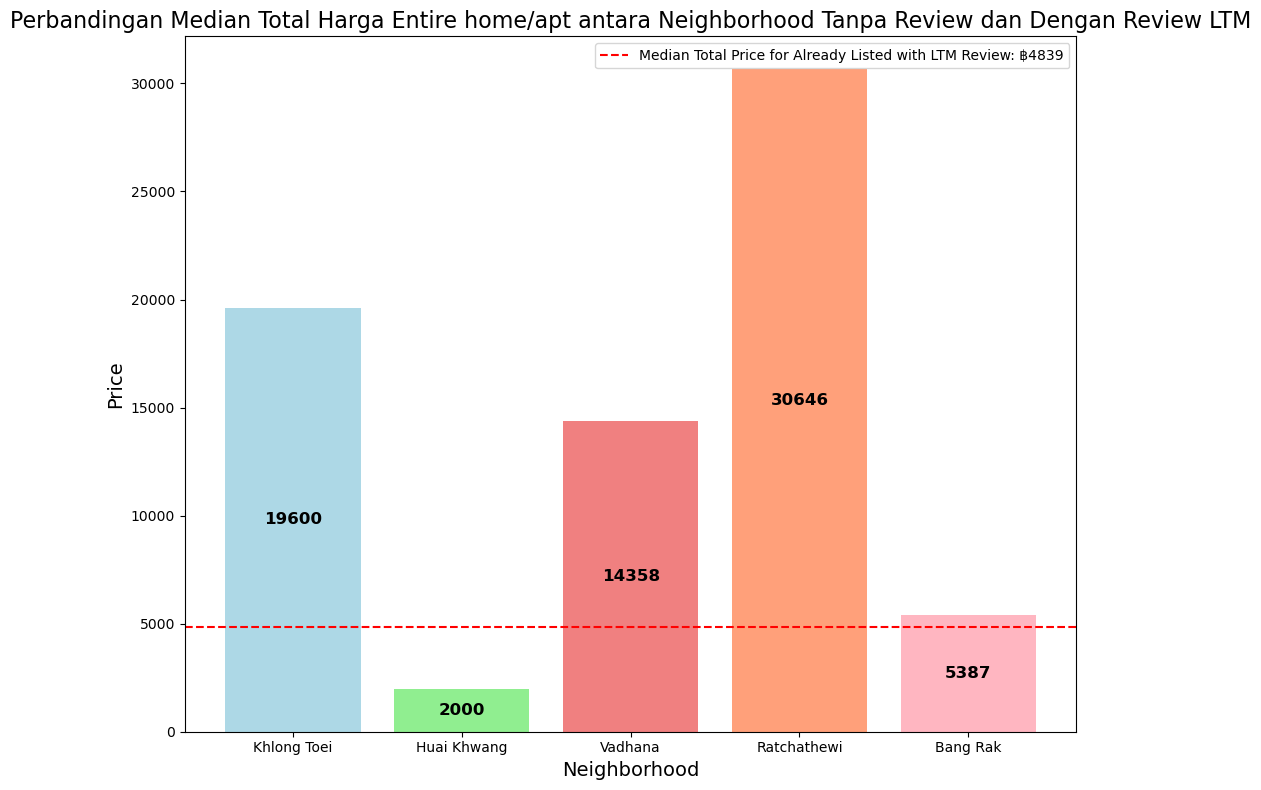

In [30]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata harga (median) untuk listing di top 5 neighborhoods tanpa review
avg__total_price_khlongtoei_home = khlongtoei_already_listed_no_ltm_data_home['total_price'].median()
avg__total_price_huaikhwang_home = huai_khwang_already_listed_no_ltm_data_home['total_price'].median()
avg__total_price_vadhana_home = vadhana_already_listed_no_ltm_data_home['total_price'].median()
avg__total_price_ratchathewi_home = ratchathewi_already_listed_no_ltm_data_home['total_price'].median()
avg__total_price_bangrak_home = bangrak_already_listed_no_ltm_data_home['total_price'].median()

# 2. Menghitung rata-rata harga (median) untuk listing dengan review LTM
median_already_ltm_home = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Entire home/apt')
]['total_price'].median()


# 3. Mengatur data untuk visualisasi
avg_prices_home = [avg__total_price_khlongtoei_home, avg__total_price_huaikhwang_home, avg__total_price_vadhana_home, avg__total_price_ratchathewi_home, avg__total_price_bangrak_home]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata harga
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_prices_home, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_prices_home):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk avg_price_diff
plt.axhline(y=median_already_ltm_home, color='red', linestyle='--', label=f'Median Total Price for Already Listed with LTM Review: ฿{median_already_ltm_home:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Perbandingan Median Total Harga Entire home/apt antara Neighborhood Tanpa Review dan Dengan Review LTM', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Dari analisis **Top 5 Neighborhoods**, ditemukan bahwa 4 dari 5 neighbourhood memiliki **median harga** yang lebih tinggi untuk tipe kamar **Entire Home/Apt**. Perbedaan **delta harga** bervariasi, dengan **delta terbesar** terdapat pada **Ratchathewi**, sementara **delta terkecil** ditemukan di **Bang Rak**. 

Temuan ini menunjukkan adanya variasi yang signifikan dalam **struktur harga** di antara neighborhood-neighborhood tersebut, yang dapat memberikan **peluang strategis** bagi perusahaan dalam menetapkan harga dan memasarkan listing mereka. Memahami perbedaan ini akan membantu dalam **mengoptimalkan strategi penetapan harga** dan meningkatkan **daya saing** di pasar.

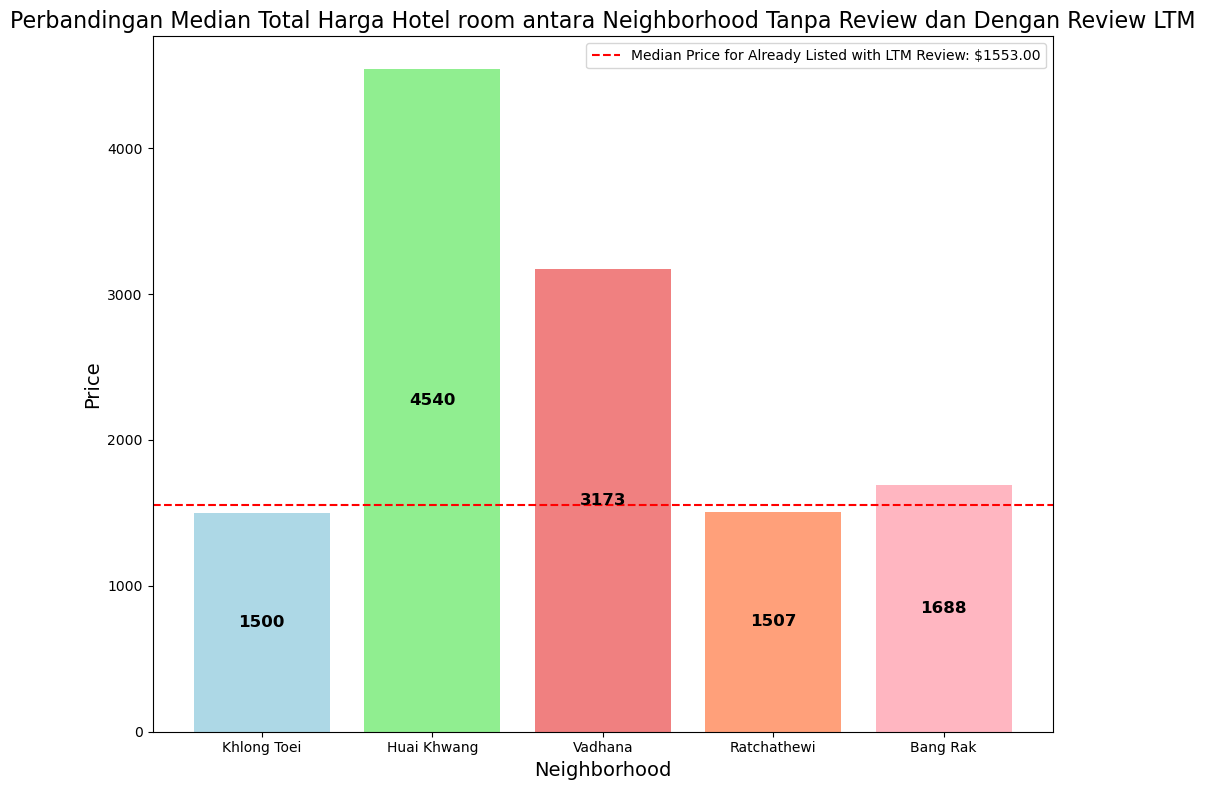

In [31]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata harga (median) untuk listing di top 5 neighborhoods tanpa review
avg__total_price_khlongtoei_hotel = khlongtoei_already_listed_no_ltm_data_hotel['total_price'].median()
avg__total_price_huaikhwang_hotel = huai_khwang_already_listed_no_ltm_data_hotel['total_price'].median()
avg__total_price_vadhana_hotel = vadhana_already_listed_no_ltm_data_hotel['total_price'].median()
avg__total_price_ratchathewi_hotel = ratchathewi_already_listed_no_ltm_data_hotel['total_price'].median()
avg__total_price_bangrak_hotel = bangrak_already_listed_no_ltm_data_hotel['total_price'].median()

# 2. Menghitung rata-rata harga (median) untuk listing dengan review LTM
median_already_ltm_hotel = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Hotel room')
]['total_price'].median()


# 3. Mengatur data untuk visualisasi
avg_prices_hotel = [avg__total_price_khlongtoei_hotel, avg__total_price_huaikhwang_hotel, avg__total_price_vadhana_hotel, avg__total_price_ratchathewi_hotel, avg__total_price_bangrak_hotel]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata harga
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_prices_hotel, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_prices_hotel):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk avg_price_diff
plt.axhline(y=median_already_ltm_hotel, color='red', linestyle='--', label=f'Median Price for Already Listed with LTM Review: ${median_already_ltm_hotel:.2f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Perbandingan Median Total Harga Hotel room antara Neighborhood Tanpa Review dan Dengan Review LTM', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Dari analisis **Top 5 Neighborhoods**, terlihat bahwa **2 dari 5 Neighborhood** memiliki **median harga** yang lebih tinggi untuk kamar tipe **Hotel Room** dibandingkan median keseluruhan. **Huai Khwang** menunjukkan **delta tertinggi** dalam harga, sedangkan **Ratchathewi** memiliki **delta terkecil**, menunjukkan rentang harga yang lebih stabil di kawasan ini.

Variasi delta harga ini dapat memberikan wawasan tentang perbedaan preferensi pasar atau daya beli di masing-masing neighborhood. Dengan adanya perbedaan harga yang mencolok, perusahaan dapat **mengidentifikasi peluang** untuk menargetkan segmen konsumen yang sesuai di setiap wilayah. Hal ini juga memberikan landasan untuk mengembangkan **strategi pemasaran** yang disesuaikan dengan karakteristik unik tiap neighborhood, seperti promosi untuk mendorong okupansi di kawasan dengan harga lebih tinggi atau peningkatan eksposur di wilayah dengan delta harga lebih rendah.

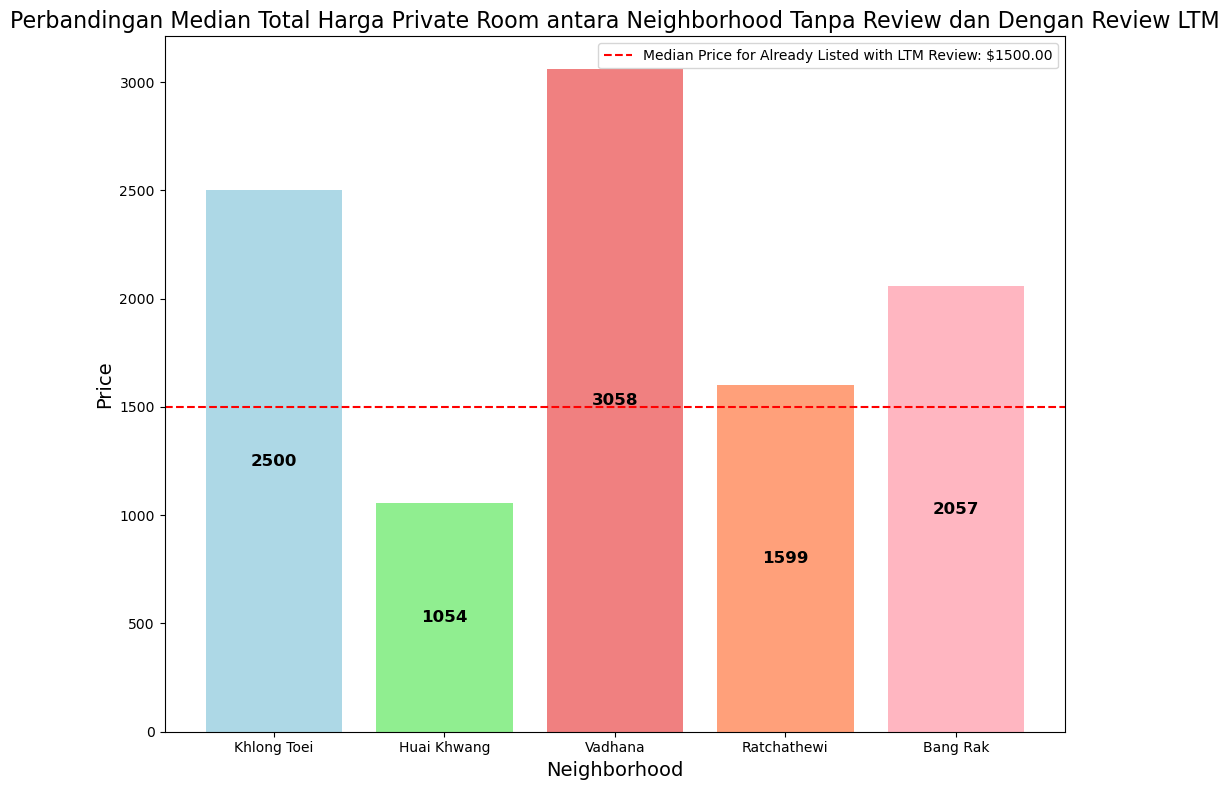

In [32]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata harga (median) untuk listing di top 5 neighborhoods tanpa review
avg__total_price_khlongtoei_private = khlongtoei_already_listed_no_ltm_data_private['total_price'].median()
avg__total_price_huaikhwang_private = huai_khwang_already_listed_no_ltm_data_private['total_price'].median()
avg__total_price_vadhana_private = vadhana_already_listed_no_ltm_data_private['total_price'].median()
avg__total_price_ratchathewi_private = ratchathewi_already_listed_no_ltm_data_private['total_price'].median()
avg__total_price_bangrak_private = bangrak_already_listed_no_ltm_data_private['total_price'].median()

# 2. Menghitung rata-rata harga (median) untuk listing dengan review LTM
median_already_ltm_private = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Private room')
]['total_price'].median()


# 3. Mengatur data untuk visualisasi
avg_prices_private = [avg__total_price_khlongtoei_private, avg__total_price_huaikhwang_private, avg__total_price_vadhana_private, avg__total_price_ratchathewi_private, avg__total_price_bangrak_private]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata harga
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_prices_private, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_prices_private):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk avg_price_diff
plt.axhline(y=median_already_ltm_private, color='red', linestyle='--', label=f'Median Price for Already Listed with LTM Review: ${median_already_ltm_private:.2f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Perbandingan Median Total Harga Private Room antara Neighborhood Tanpa Review dan Dengan Review LTM', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Berdasarkan analisis **Top 5 Neighborhoods** untuk tipe kamar **Private Room**, ditemukan bahwa **4 dari 5 neighborhood** memiliki **harga** di atas **Median Total Harga Private Room**. Perbedaan harga tertinggi terlihat di **Vadhana**, sementara **Ratchathewi** menunjukkan perbedaan harga terkecil dalam kategori ini.

Temuan ini memberikan wawasan penting mengenai variasi harga dalam kategori **Private Room** di berbagai wilayah. Pemahaman tentang perbedaan harga ini dapat membantu perusahaan untuk memberikan rekomendasi **strategi penetapan harga** yang lebih adaptif, sehingga mampu menarik konsumen di wilayah dengan harga lebih tinggi serta mempertahankan daya saing di area dengan perbedaan yang lebih rendah.

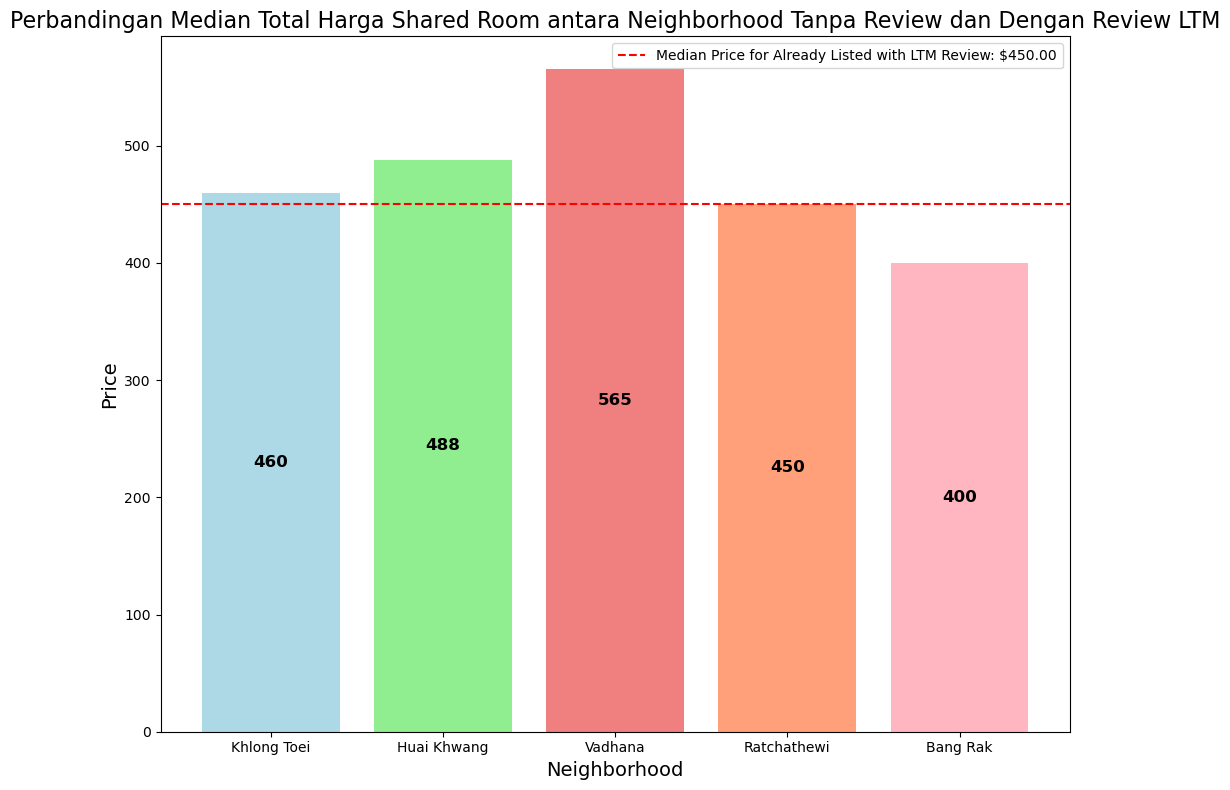

In [33]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata harga (median) untuk listing di top 5 neighborhoods tanpa review
avg__total_price_khlongtoei_shared = khlongtoei_already_listed_no_ltm_data_shared['total_price'].median()
avg__total_price_huaikhwang_shared = huai_khwang_already_listed_no_ltm_data_shared['total_price'].median()
avg__total_price_vadhana_shared = vadhana_already_listed_no_ltm_data_shared['total_price'].median()
avg__total_price_ratchathewi_shared = ratchathewi_already_listed_no_ltm_data_shared['total_price'].median()
avg__total_price_bangrak_shared = bangrak_already_listed_no_ltm_data_shared['total_price'].median()

# 2. Menghitung rata-rata harga (median) untuk listing dengan review LTM
median_already_ltm_shared = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Shared room')
]['total_price'].median()


# 3. Mengatur data untuk visualisasi
avg_prices_shared = [avg__total_price_khlongtoei_shared, avg__total_price_huaikhwang_shared, avg__total_price_vadhana_shared, avg__total_price_ratchathewi_shared, avg__total_price_bangrak_shared]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata harga
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_prices_shared, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_prices_shared):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk avg_price_diff
plt.axhline(y=median_already_ltm_shared, color='red', linestyle='--', label=f'Median Price for Already Listed with LTM Review: ${median_already_ltm_shared:.2f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Perbandingan Median Total Harga Shared Room antara Neighborhood Tanpa Review dan Dengan Review LTM', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Berdasarkan analisis **Top 5 Neighborhoods** untuk tipe kamar **Shared Room**, didapatkan beberapa temuan penting:

- **3 dari 5 neighborhood** yang dianalisis memiliki **harga di atas Median Total Harga Shared Room**. Hal ini menunjukkan potensi keunikan atau daya tarik area tersebut, yang mungkin meningkatkan permintaan dan memungkinkan harga yang lebih tinggi.

- **Vadhana** menonjol dengan **perbedaan harga tertinggi** di atas median, mengindikasikan potensi ketertarikan pengunjung yang kuat terhadap area ini. Insight ini dapat membantu perusahaan mempertimbangkan strategi harga yang sesuai dengan nilai premium yang ada di lokasi ini.

- **Ratchathewi** memperlihatkan **harga yang sama dengan median total harga listing yang memiliki review LTM**, mengindikasikan stabilitas harga. Kondisi ini menunjukkan adanya keseimbangan antara penawaran dan permintaan yang dapat dipertahankan.

Temuan ini memberikan wawasan penting mengenai variasi harga dalam kategori **Shared Room** di berbagai wilayah. Pemahaman tentang perbedaan harga ini dapat membantu perusahaan dalam memberikan rekomendasi **strategi penetapan harga** yang lebih adaptif, sehingga mampu menarik konsumen di wilayah dengan harga lebih tinggi serta mempertahankan daya saing di area dengan perbedaan harga yang lebih rendah.


# **Perbandingan Median Minimum Night antara Neighborhood Tanpa Review dan Dengan Review LTM**

In [34]:
# Uji Kolmogorov-Smirnov
ks_test = stats.kstest(air_bnb['minimum_nights'], 'norm', args=(air_bnb['minimum_nights'].mean(), air_bnb['minimum_nights'].std()))
print('Statistik Kolmogorov-Smirnov:', ks_test.statistic)
print('P-Value:', ks_test.pvalue)

# Interpretasi
if ks_test.pvalue > 0.05:
    print("Data terdistribusi normal (tidak ditolak hipotesis nol).")
else:
    print("Data tidak terdistribusi normal (ditolak hipotesis nol).")

Statistik Kolmogorov-Smirnov: 0.389366009195434
P-Value: 0.0
Data tidak terdistribusi normal (ditolak hipotesis nol).


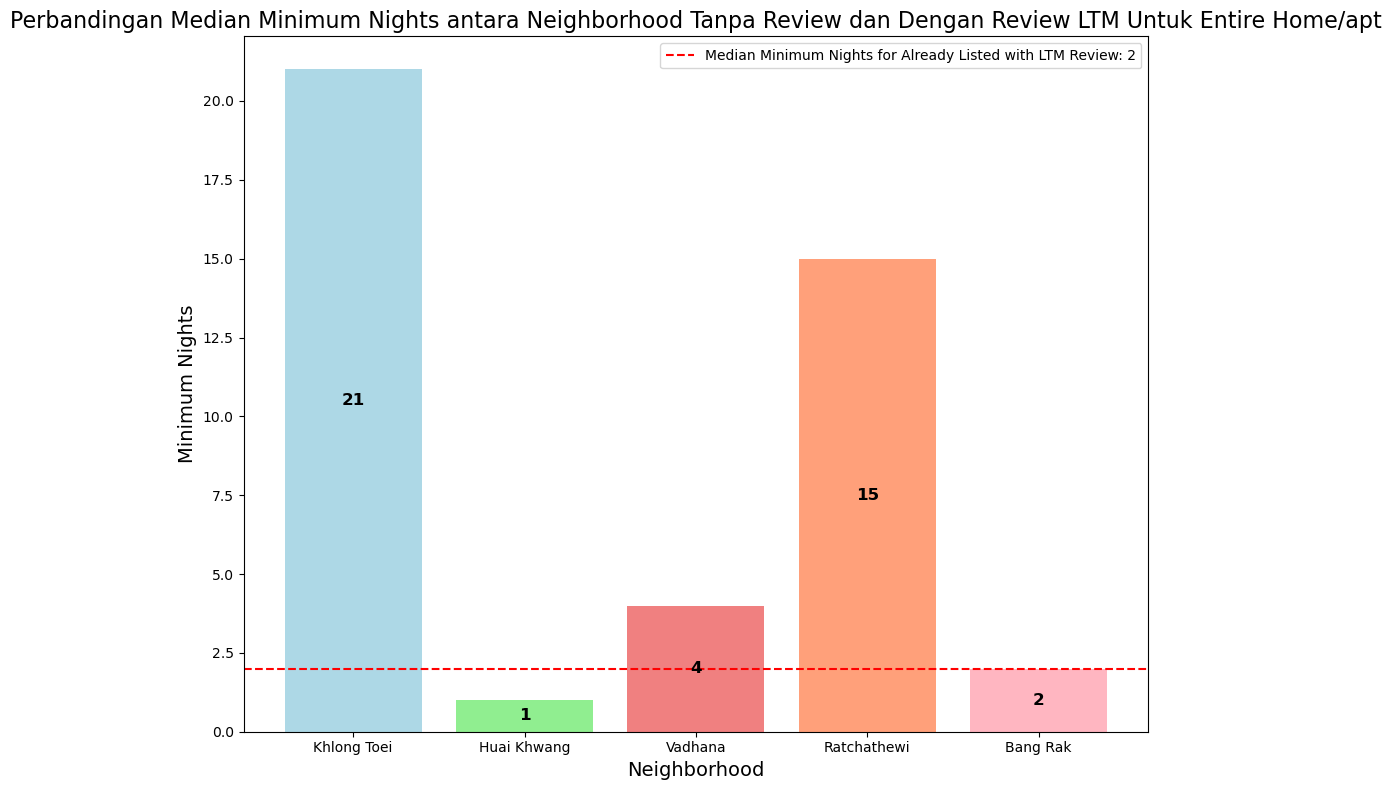

In [35]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata minimum nights untuk listing di top 5 neighborhoods tanpa review
avg__minimum_nights_khlongtoei_home = khlongtoei_already_listed_no_ltm_data_home['minimum_nights'].median()
avg__minimum_nights_huaikhwang_home = huai_khwang_already_listed_no_ltm_data_home['minimum_nights'].median()
avg__minimum_nights_vadhana_home = vadhana_already_listed_no_ltm_data_home['minimum_nights'].median()
avg__minimum_nights_ratchathewi_home = ratchathewi_already_listed_no_ltm_data_home['minimum_nights'].median()
avg__minimum_nights_bangrak_home = bangrak_already_listed_no_ltm_data_home['minimum_nights'].median()

# 2. Menghitung rata-rata minimum nights untuk listing dengan review LTM
median_already_ltm_home = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Entire home/apt')
]['minimum_nights'].median()

# 3. Mengatur data untuk visualisasi
avg_minimum_nights_home = [avg__minimum_nights_khlongtoei_home, avg__minimum_nights_huaikhwang_home, 
                            avg__minimum_nights_vadhana_home, avg__minimum_nights_ratchathewi_home, 
                            avg__minimum_nights_bangrak_home]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata minimum nights
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_minimum_nights_home, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_minimum_nights_home):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median minimum nights
plt.axhline(y=median_already_ltm_home, color='red', linestyle='--', label=f'Median Minimum Nights for Already Listed with LTM Review: {median_already_ltm_home:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)
plt.title('Perbandingan Median Minimum Nights antara Neighborhood Tanpa Review dan Dengan Review LTM Untuk Entire Home/apt', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## Interpretasi

Dalam analisis terhadap **Top 5 Neighborhoods** tanpa LTM, ditemukan bahwa **tiga area**—**Khlong Toei**, **Ratchathewi**, **Vadhana**—memiliki **Median Minimum Nights** yang lebih tinggi dibandingkan dengan **Median Minimum Nights** dari listing yang memiliki review LTM, dengan Khlong Toei mencatatkan perbedaan terbesar.

Sementara itu, **Bang Rak** menunjukkan nilai **Median Minimum Nights** yang sejalan dengan median listing yang memiliki review LTM. Temuan ini mencerminkan kebijakan penginapan yang berbeda di masing-masing neighborhood, yang dapat mempengaruhi keputusan wisatawan dalam memilih tempat tinggal. Insight ini penting untuk pengembangan strategi pemasaran dan penetapan harga yang lebih efektif.


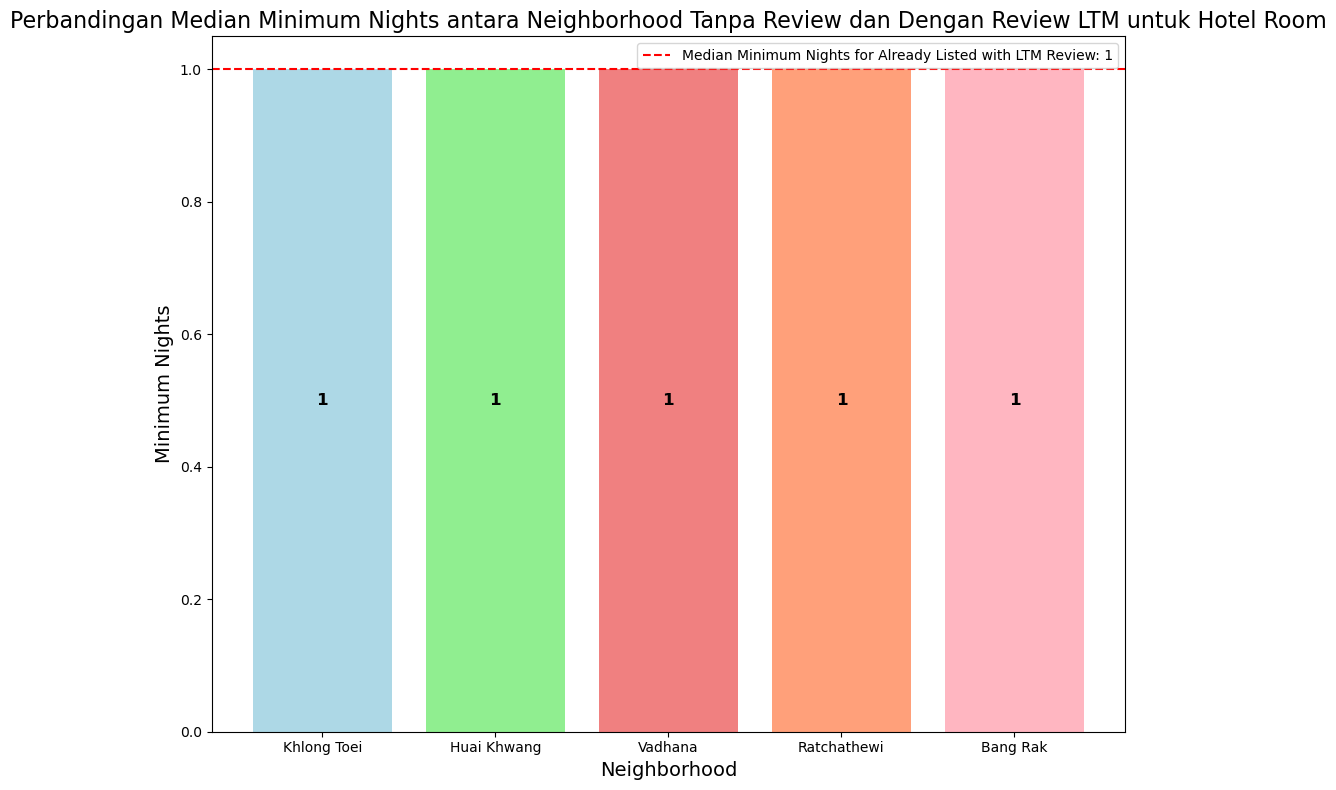

In [36]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata minimum nights untuk listing di top 5 neighborhoods tanpa review
avg__minimum_nights_khlongtoei_hotel = khlongtoei_already_listed_no_ltm_data_hotel['minimum_nights'].median()
avg__minimum_nights_huaikhwang_hotel = huai_khwang_already_listed_no_ltm_data_hotel['minimum_nights'].median()
avg__minimum_nights_vadhana_hotel = vadhana_already_listed_no_ltm_data_hotel['minimum_nights'].median()
avg__minimum_nights_ratchathewi_hotel = ratchathewi_already_listed_no_ltm_data_hotel['minimum_nights'].median()
avg__minimum_nights_bangrak_hotel = bangrak_already_listed_no_ltm_data_hotel['minimum_nights'].median()

# 2. Menghitung rata-rata minimum nights untuk listing dengan review LTM
median_already_ltm_hotel = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Hotel room')
]['minimum_nights'].median()

# 3. Mengatur data untuk visualisasi
avg_minimum_nights_hotel = [
    avg__minimum_nights_khlongtoei_hotel, 
    avg__minimum_nights_huaikhwang_hotel, 
    avg__minimum_nights_vadhana_hotel, 
    avg__minimum_nights_ratchathewi_hotel, 
    avg__minimum_nights_bangrak_hotel
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata minimum nights
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_minimum_nights_hotel, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang di tengah
for i, v in enumerate(avg_minimum_nights_hotel):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median minimum nights
plt.axhline(y=median_already_ltm_hotel, color='red', linestyle='--', label=f'Median Minimum Nights for Already Listed with LTM Review: {median_already_ltm_hotel:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)
plt.title('Perbandingan Median Minimum Nights antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Hotel Room', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Seluruh **Top 5 Neighborhoods** untuk room type **Hotel Room** menunjukkan **median Minimum Nights yang seragam**, yaitu **1 malam**, median dari Top 5 Neighborhood ini sesuai dengan Median Minimum Nights Listing yang memiliki Review LTM. Kesamaan ini mengindikasikan fleksibilitas yang tinggi bagi wisatawan di wilayah-wilayah utama ini, memungkinkan mereka untuk memilih durasi inap yang lebih singkat. Insight ini dapat menjadi keuntungan kompetitif, karena kebijakan minimum nights yang rendah cenderung lebih menarik bagi wisatawan yang mencari opsi penginapan jangka pendek.

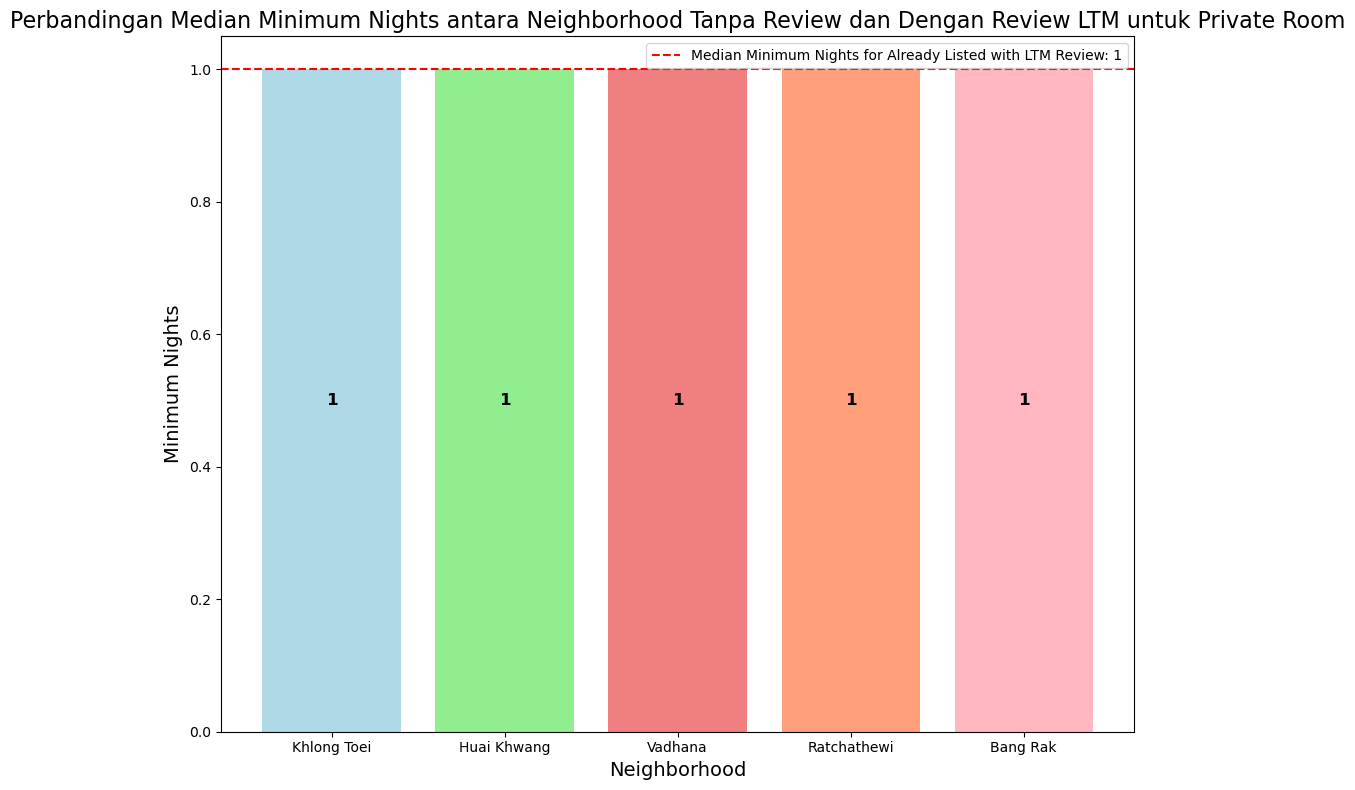

In [37]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata minimum nights untuk listing di top 5 neighborhoods tanpa review
avg__minimum_nights_khlongtoei_private = khlongtoei_already_listed_no_ltm_data_private['minimum_nights'].median()
avg__minimum_nights_huaikhwang_private = huai_khwang_already_listed_no_ltm_data_private['minimum_nights'].median()
avg__minimum_nights_vadhana_private = vadhana_already_listed_no_ltm_data_private['minimum_nights'].median()
avg__minimum_nights_ratchathewi_private = ratchathewi_already_listed_no_ltm_data_private['minimum_nights'].median()
avg__minimum_nights_bangrak_private = bangrak_already_listed_no_ltm_data_private['minimum_nights'].median()

# 2. Menghitung rata-rata minimum nights untuk listing dengan review LTM
median_already_ltm_private = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Private room')
]['minimum_nights'].median()

# 3. Mengatur data untuk visualisasi
avg_minimum_nights_private = [
    avg__minimum_nights_khlongtoei_private, 
    avg__minimum_nights_huaikhwang_private, 
    avg__minimum_nights_vadhana_private, 
    avg__minimum_nights_ratchathewi_private, 
    avg__minimum_nights_bangrak_private
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata minimum nights
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_minimum_nights_private, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang di tengah
for i, v in enumerate(avg_minimum_nights_private):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median minimum nights
plt.axhline(y=median_already_ltm_private, color='red', linestyle='--', label=f'Median Minimum Nights for Already Listed with LTM Review: {median_already_ltm_private:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)
plt.title('Perbandingan Median Minimum Nights antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Private Room', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## Interpretasi

Dari analisis **Top 5 Neighborhoods** untuk room type **Private Room**, terlihat bahwa semua area memiliki **median Minimum Nights yang konsisten**, yaitu **1 malam**. Angka ini mencerminkan keselarasan dengan **Median Minimum Nights** dari listing yang memiliki review LTM. Kondisi ini menunjukkan tingkat fleksibilitas yang tinggi bagi wisatawan, yang memungkinkan mereka memilih durasi menginap yang lebih singkat sesuai kebutuhan.

Keseragaman ini berpotensi memberikan **keunggulan kompetitif**, karena kebijakan minimum nights yang rendah sangat menarik bagi pengunjung yang mencari pilihan akomodasi jangka pendek. Dengan memahami tren ini, perusahaan dapat memanfaatkan strategi penawaran yang lebih adaptif, yang berpotensi meningkatkan daya tarik dan kepuasan konsumen.


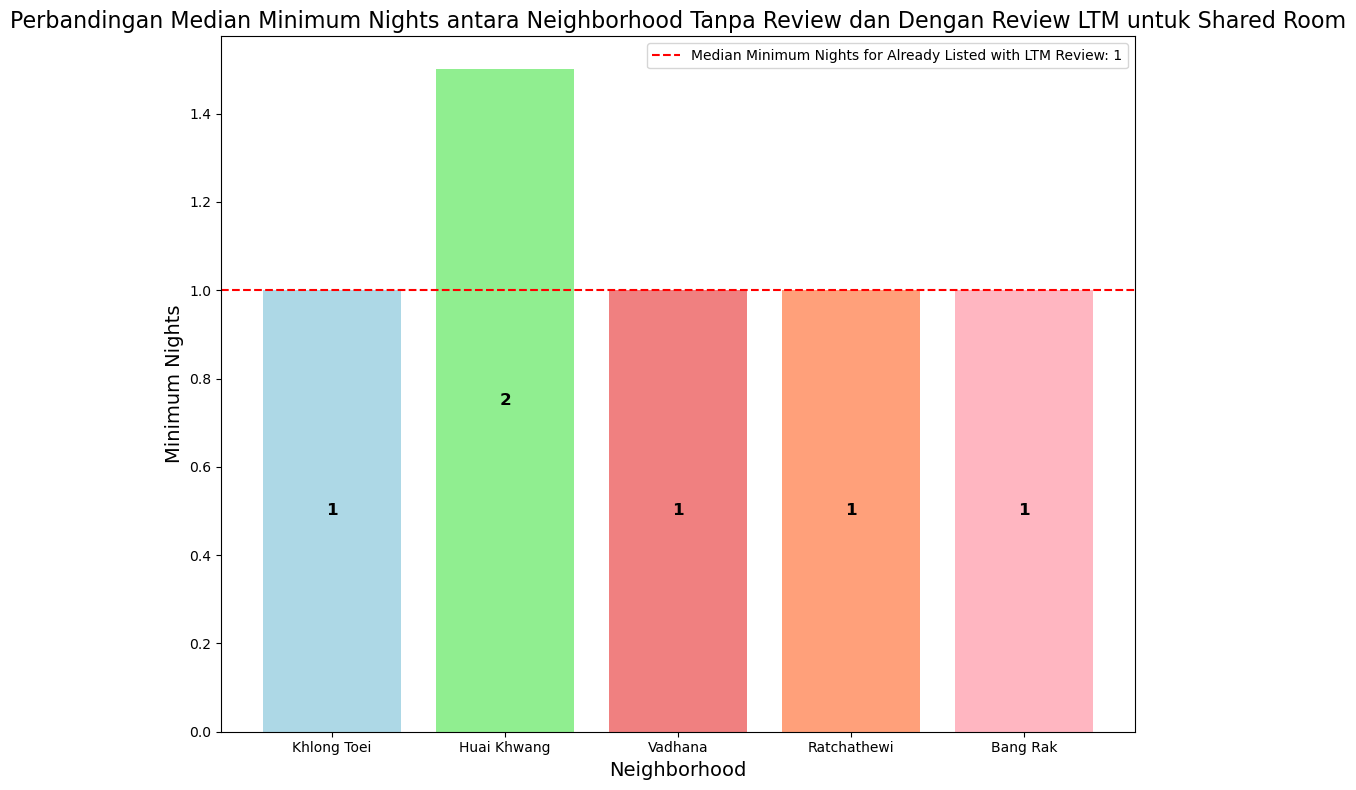

In [38]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata minimum nights untuk listing di top 5 neighborhoods tanpa review
avg__minimum_nights_khlongtoei_shared = khlongtoei_already_listed_no_ltm_data_shared['minimum_nights'].median()
avg__minimum_nights_huaikhwang_shared = huai_khwang_already_listed_no_ltm_data_shared['minimum_nights'].median()
avg__minimum_nights_vadhana_shared = vadhana_already_listed_no_ltm_data_shared['minimum_nights'].median()
avg__minimum_nights_ratchathewi_shared = ratchathewi_already_listed_no_ltm_data_shared['minimum_nights'].median()
avg__minimum_nights_bangrak_shared = bangrak_already_listed_no_ltm_data_shared['minimum_nights'].median()

# 2. Menghitung rata-rata minimum nights untuk listing dengan review LTM
median_already_ltm_shared = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Shared room')
]['minimum_nights'].median()

# 3. Mengatur data untuk visualisasi
avg_minimum_nights_shared = [
    avg__minimum_nights_khlongtoei_shared, 
    avg__minimum_nights_huaikhwang_shared, 
    avg__minimum_nights_vadhana_shared, 
    avg__minimum_nights_ratchathewi_shared, 
    avg__minimum_nights_bangrak_shared
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata minimum nights
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_minimum_nights_shared, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang di tengah
for i, v in enumerate(avg_minimum_nights_shared):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median minimum nights
plt.axhline(y=median_already_ltm_shared, color='red', linestyle='--', label=f'Median Minimum Nights for Already Listed with LTM Review: {median_already_ltm_shared:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Minimum Nights', fontsize=14)
plt.title('Perbandingan Median Minimum Nights antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Shared Room', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## Interpretasi

Analisis terhadap **Top 5 Neighborhoods** pada room type **Shared room**, menunjukkan bahwa hampir semua area memiliki **median Minimum Nights** yang seragam, yaitu **1 malam**. Hal ini sejalan dengan median untuk listing yang memiliki review LTM, di mana 4 dari 5 neighborhood menunjukkan kesesuaian nilai median yang mencolok. 

Namun, **Huai Khwang** mencatatkan perbedaan dengan median yaitu **2 malam**, meskipun selisih ini tidak terlalu signifikan. Temuan ini menggambarkan konsistensi dalam kebijakan penginapan di sebagian besar wilayah, memberikan fleksibilitas bagi wisatawan. Sementara itu, Huai Khwang tetap menjaga daya tariknya dengan sedikit perbedaan, yang menunjukkan potensi untuk menarik segmen pasar yang mencari durasi inap sedikit lebih lama. 

# **Perbandingan Median Availability Dalam 1 Tahun pada Top 5 Already Listed Neighbourhood Tanpa LTM dan Semua Already Listed Neighbourhood dengan LTM**

In [39]:
# Uji Kolmogorov-Smirnov
ks_test = stats.kstest(already_listed['availability_365'], 'norm', args=(already_listed['availability_365'].mean(), already_listed['availability_365'].std()))
print('Statistik Kolmogorov-Smirnov:', ks_test.statistic)
print('P-Value:', ks_test.pvalue)

# Interpretasi
if ks_test.pvalue > 0.05:
    print("Data terdistribusi normal (tidak ditolak hipotesis nol).")
else:
    print("Data tidak terdistribusi normal (ditolak hipotesis nol).")

Statistik Kolmogorov-Smirnov: 0.18070518674598757
P-Value: 6.090123167128243e-287
Data tidak terdistribusi normal (ditolak hipotesis nol).


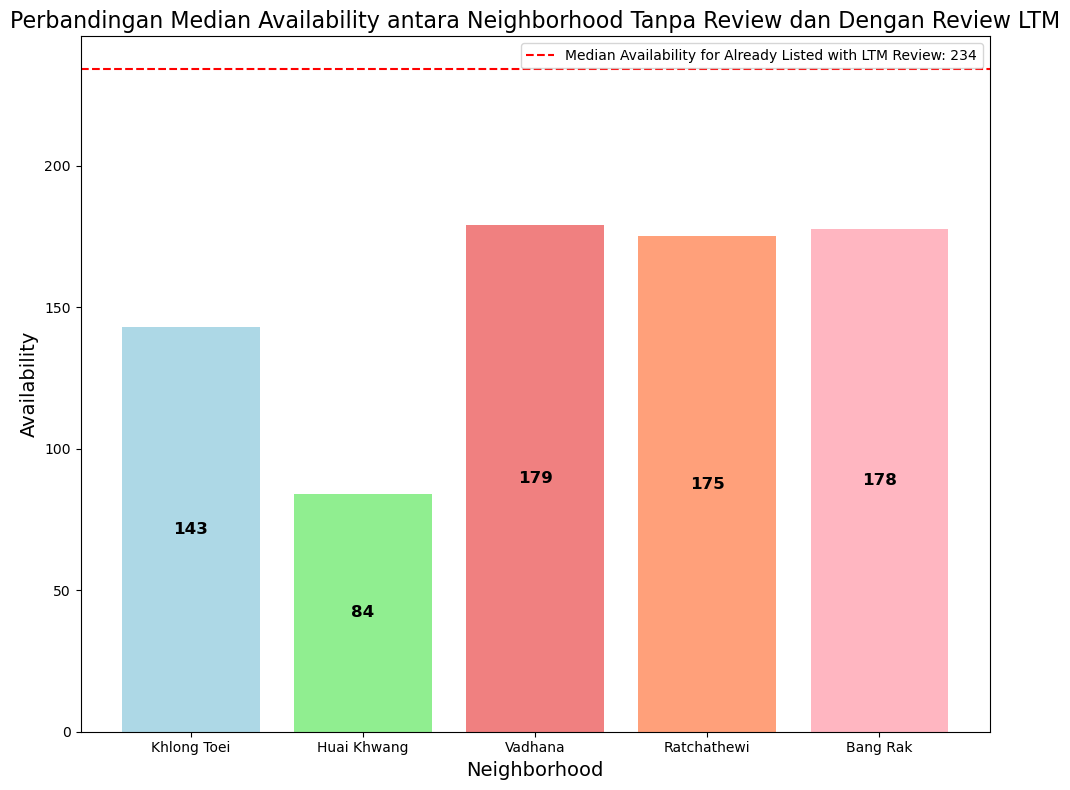

In [40]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata availability untuk listing di top 5 neighborhoods tanpa review
avg_availability_khlongtoei_home = khlongtoei_already_listed_no_ltm_data_home['availability_365'].median()
avg_availability_huaikhwang_home = huai_khwang_already_listed_no_ltm_data_home['availability_365'].median()
avg_availability_vadhana_home = vadhana_already_listed_no_ltm_data_home['availability_365'].median()
avg_availability_ratchathewi_home = ratchathewi_already_listed_no_ltm_data_home['availability_365'].median()
avg_availability_bangrak_home = bangrak_already_listed_no_ltm_data_home['availability_365'].median()

# 2. Menghitung rata-rata availability untuk listing dengan review LTM
median_already_ltm_home = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Entire home/apt')
]['availability_365'].median()

# 3. Mengatur data untuk visualisasi
avg_availability_home = [avg_availability_khlongtoei_home, avg_availability_huaikhwang_home, 
                         avg_availability_vadhana_home, avg_availability_ratchathewi_home, 
                         avg_availability_bangrak_home]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata availability
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_availability_home, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_availability_home):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median availability
plt.axhline(y=median_already_ltm_home, color='red', linestyle='--', label=f'Median Availability for Already Listed with LTM Review: {median_already_ltm_home:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Availability', fontsize=14)  # Ganti label sumbu-y
plt.title('Perbandingan Median Availability antara Neighborhood Tanpa Review dan Dengan Review LTM', fontsize=16)  # Ganti judul

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Dari analisis terhadap **kelima neighborhood**, terlihat bahwa median **availability** menunjukkan angka yang sama. Hal ini menandakan bahwa banyak host yang belum secara aktif memperbarui ketersediaan akomodasi mereka. Situasi ini bisa menjadi indikasi kurangnya perhatian terhadap manajemen listing, yang pada gilirannya dapat mempengaruhi pengalaman tamu dan optimasi pendapatan. 

Dengan memahami pola ini, perusahaan dapat memberikan panduan atau pelatihan kepada host untuk meningkatkan frekuensi pembaruan availability, sehingga meningkatkan daya saing dan kepuasan pelanggan di pasar penginapan.

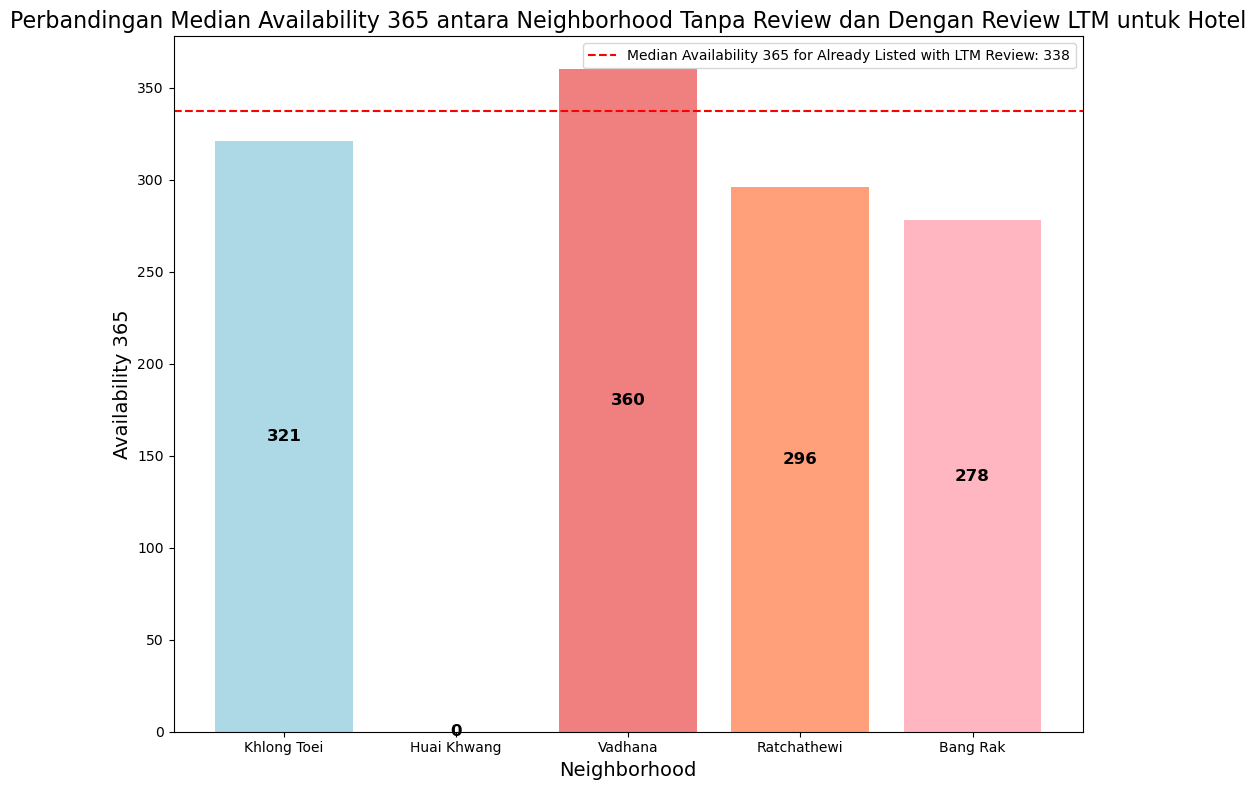

In [41]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata availability 365 untuk listing di top 5 neighborhoods tanpa review untuk hotel
avg__availability_khlongtoei_hotel = khlongtoei_already_listed_no_ltm_data_hotel['availability_365'].median()
avg__availability_huaikhwang_hotel = huai_khwang_already_listed_no_ltm_data_hotel['availability_365'].median()
avg__availability_vadhana_hotel = vadhana_already_listed_no_ltm_data_hotel['availability_365'].median()
avg__availability_ratchathewi_hotel = ratchathewi_already_listed_no_ltm_data_hotel['availability_365'].median()
avg__availability_bangrak_hotel = bangrak_already_listed_no_ltm_data_hotel['availability_365'].median()

# 2. Menghitung rata-rata availability 365 untuk listing dengan review LTM untuk hotel
median_already_ltm_hotel = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Hotel room')
]['availability_365'].median()

# 3. Mengatur data untuk visualisasi
avg_availability_hotel = [
    avg__availability_khlongtoei_hotel, 
    avg__availability_huaikhwang_hotel, 
    avg__availability_vadhana_hotel, 
    avg__availability_ratchathewi_hotel, 
    avg__availability_bangrak_hotel
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata availability 365 untuk hotel
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_availability_hotel, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang
for i, v in enumerate(avg_availability_hotel):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median availability 365
plt.axhline(y=median_already_ltm_hotel, color='red', linestyle='--', label=f'Median Availability 365 for Already Listed with LTM Review: {median_already_ltm_hotel:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Availability 365', fontsize=14)
plt.title('Perbandingan Median Availability 365 antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Hotel', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Dari grafik yang dianalisis, terlihat bahwa **neighborhood Huai Khwang** menunjukkan anomali yang mencolok, dengan nilai **median availability** sebesar **0**. Hal ini menunjukkan bahwa sekitar **50%** dari listing di daerah tersebut tidak memiliki **availability** yang terpasang, sehingga mereka terlihat tidak tersedia untuk pemesanan. 

Kondisi ini dapat berpotensi menghalangi pelanggan dari memilih akomodasi di area tersebut, karena ketersediaan yang tidak jelas dapat mengurangi kepercayaan dan minat calon tamu. Oleh karena itu, penting bagi host di Huai Khwang untuk memperbarui informasi availability mereka, agar dapat menarik lebih banyak penyewa dan memaksimalkan pendapatan.

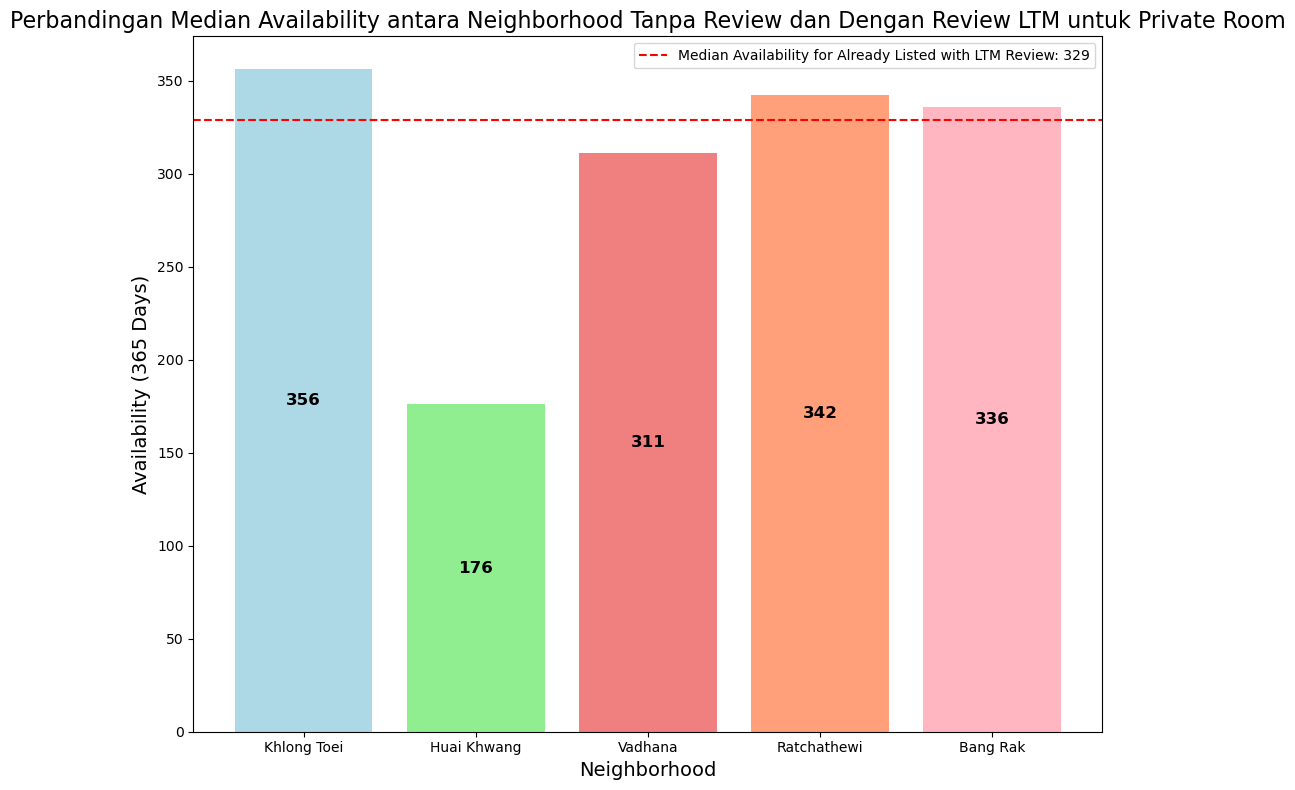

In [42]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata availability untuk listing di top 5 neighborhoods tanpa review
avg__availability_khlongtoei_private = khlongtoei_already_listed_no_ltm_data_private['availability_365'].median()
avg__availability_huaikhwang_private = huai_khwang_already_listed_no_ltm_data_private['availability_365'].median()
avg__availability_vadhana_private = vadhana_already_listed_no_ltm_data_private['availability_365'].median()
avg__availability_ratchathewi_private = ratchathewi_already_listed_no_ltm_data_private['availability_365'].median()
avg__availability_bangrak_private = bangrak_already_listed_no_ltm_data_private['availability_365'].median()

# 2. Menghitung rata-rata availability untuk listing dengan review LTM
median_already_ltm_private = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Private room')
]['availability_365'].median()

# 3. Mengatur data untuk visualisasi
avg_availability_private = [
    avg__availability_khlongtoei_private, 
    avg__availability_huaikhwang_private, 
    avg__availability_vadhana_private, 
    avg__availability_ratchathewi_private, 
    avg__availability_bangrak_private
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata availability
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_availability_private, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang di tengah
for i, v in enumerate(avg_availability_private):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median availability
plt.axhline(y=median_already_ltm_private, color='red', linestyle='--', label=f'Median Availability for Already Listed with LTM Review: {median_already_ltm_private:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Availability (365 Days)', fontsize=14)
plt.title('Perbandingan Median Availability antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Private Room', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Dari analisis terhadap **Top 5 Neighborhoods** untuk tipe kamar **Private Room**, terlihat bahwa **empat dari lima neighborhood** memiliki nilai **median availability** yang cukup konsisten dengan median availability dari listing yang memiliki **review LTM**. Namun, **Huai Khwang** menunjukkan perbedaan yang cukup signifikan dibandingkan dengan patokan tersebut. 

Kondisi ini berpotensi memengaruhi kelancaran penjualan di Huai Khwang, karena rendahnya availability dapat mengakibatkan kurangnya pilihan bagi calon tamu. Oleh karena itu, host di area ini perlu meningkatkan frekuensi pembaruan availability untuk menarik lebih banyak pelanggan dan memaksimalkan potensi pendapatan mereka.

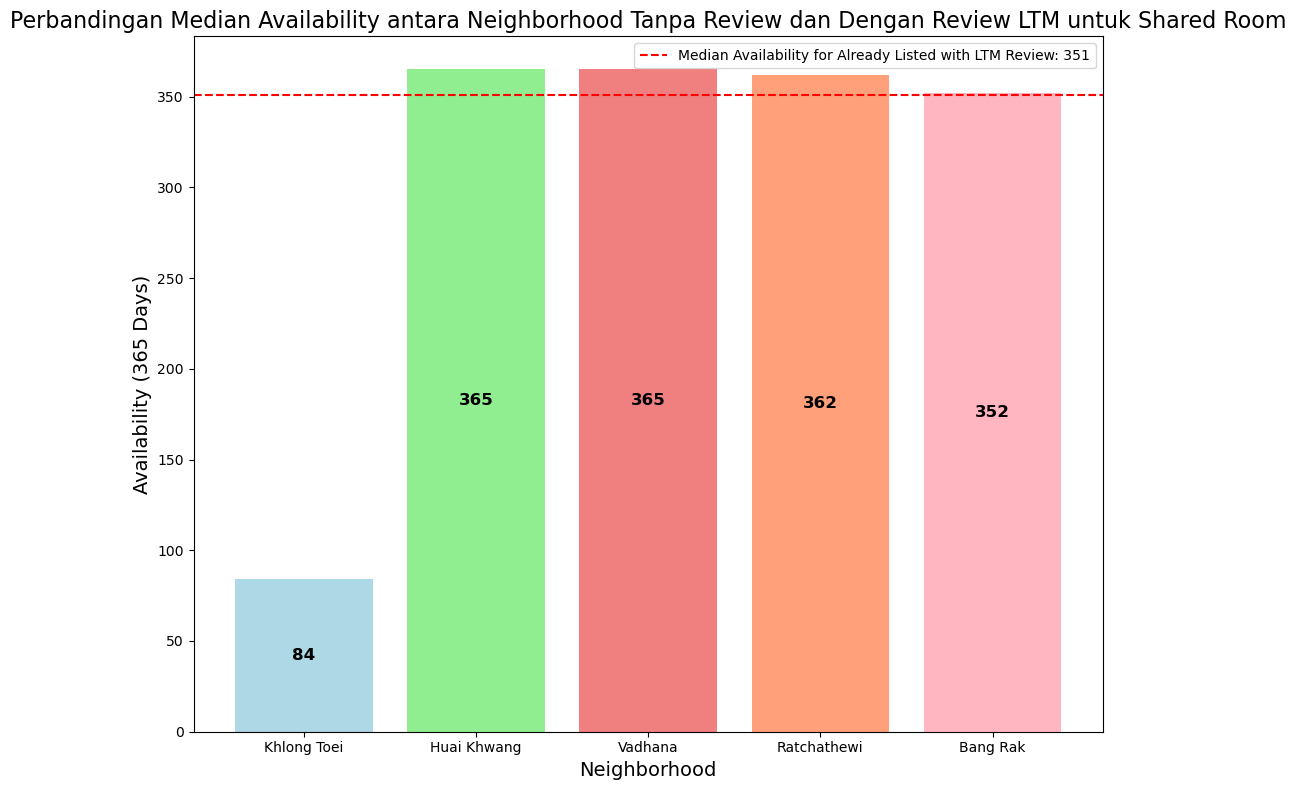

In [43]:
import matplotlib.pyplot as plt

# 1. Menghitung rata-rata availability untuk listing di top 5 neighborhoods tanpa review
avg__availability_khlongtoei_shared = khlongtoei_already_listed_no_ltm_data_shared['availability_365'].median()
avg__availability_huaikhwang_shared = huai_khwang_already_listed_no_ltm_data_shared['availability_365'].median()
avg__availability_vadhana_shared = vadhana_already_listed_no_ltm_data_shared['availability_365'].median()
avg__availability_ratchathewi_shared = ratchathewi_already_listed_no_ltm_data_shared['availability_365'].median()
avg__availability_bangrak_shared = bangrak_already_listed_no_ltm_data_shared['availability_365'].median()

# 2. Menghitung rata-rata availability untuk listing dengan review LTM
median_already_ltm_shared = already_listed[
    (already_listed['number_of_reviews_ltm'] > 0) & 
    (already_listed['room_type'] == 'Shared room')
]['availability_365'].median()

# 3. Mengatur data untuk visualisasi
avg_availability_shared = [
    avg__availability_khlongtoei_shared, 
    avg__availability_huaikhwang_shared, 
    avg__availability_vadhana_shared, 
    avg__availability_ratchathewi_shared, 
    avg__availability_bangrak_shared
]
labels = ['Khlong Toei', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Bang Rak']

# 4. Membuat bar chart untuk perbandingan rata-rata availability
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, avg_availability_shared, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])

# Menambahkan label pada setiap batang di tengah
for i, v in enumerate(avg_availability_shared):
    plt.text(i, v / 2, f'{v:.0f}', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan garis batas untuk median availability
plt.axhline(y=median_already_ltm_shared, color='red', linestyle='--', label=f'Median Availability for Already Listed with LTM Review: {median_already_ltm_shared:.0f}')

# Menambahkan label dan judul
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Availability (365 Days)', fontsize=14)
plt.title('Perbandingan Median Availability antara Neighborhood Tanpa Review dan Dengan Review LTM untuk Shared Room', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


## Interpretasi

Analisis terhadap **Top 5 Neighborhoods** untuk tipe kamar **Shared Room** mengungkapkan bahwa **empat dari lima neighborhood** memiliki nilai **median availability** yang sejalan dengan median availability dari listing yang memiliki **review LTM**. Ini menunjukkan bahwa mayoritas area ini memiliki ketersediaan yang baik, memungkinkan host untuk menarik perhatian lebih banyak calon tamu.

Namun, **Khlong Toei** menjadi pengecualian, menunjukkan perbedaan yang cukup signifikan dibandingkan dengan patokan tersebut. Perbedaan ini menandakan bahwa ketersediaan listing di Khlong Toei mungkin tidak optimal, yang dapat memengaruhi daya tarik area ini bagi wisatawan. Oleh karena itu, penting bagi host di Khlong Toei untuk memperhatikan dan meningkatkan **availability** mereka, guna memastikan bahwa mereka tidak kehilangan peluang untuk menyewa kepada tamu yang mencari akomodasi di kawasan yang populer ini.

# **Proporsi Host di Top 5 Neighbouhood: 1 Listing vs >1 Listing**

In [44]:
top_5_locations_already_no_ltm_listcount_0 = top_5_locations_already_no_ltm[top_5_locations_already_no_ltm['calculated_host_listings_count']==1]
top_5_locations_already_no_ltm_listcount_1 = top_5_locations_already_no_ltm[top_5_locations_already_no_ltm['calculated_host_listings_count'] > 1].groupby('host_name')['calculated_host_listings_count'].nunique().reset_index()

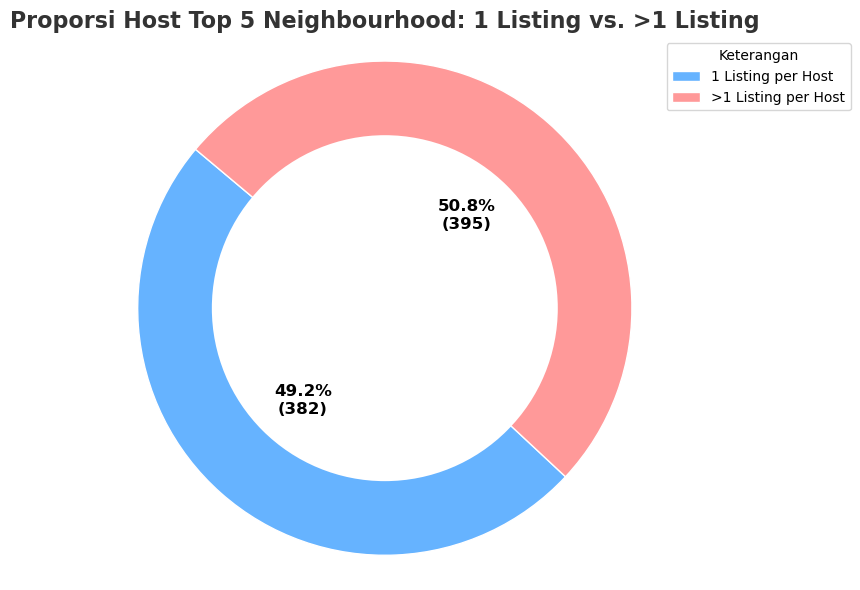

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah untuk setiap kategori
count_listcount_0 = len(top_5_locations_already_no_ltm_listcount_0)  # 1 Listing per Host
count_listcount_1 = len(top_5_locations_already_no_ltm_listcount_1)  # >1 Listing per Host

# Menyusun data untuk donut chart
data = [count_listcount_0, count_listcount_1]
labels = ['1 Listing per Host', '>1 Listing per Host']
colors = ['#66b3ff', '#ff9999']

# Menghitung total untuk persentase
total_count = sum(data)
percentages = [(count / total_count) * 100 for count in data]

# Membuat donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(data, labels=None, colors=colors, autopct='', startangle=140, wedgeprops=dict(edgecolor='w'))

# Membuat lingkaran putih di tengah untuk efek donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan jumlah listing dan persentase ke dalam donut chart
for i, wedge in enumerate(wedges):
    # Hitung sudut dan posisi teks
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = wedge.r * 0.5 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.5 * np.sin(np.deg2rad(angle))
    
    # Tambahkan jumlah di atas dan persentase di bawah
    plt.text(x, y, f'{percentages[i]:.1f}%\n({data[i]})', ha='center', va='center', fontsize=12, weight='bold', color='black')

# Menambahkan legenda
plt.legend(wedges, labels, title="Keterangan", loc='upper right', bbox_to_anchor=(1.3, 1))

# Menambahkan judul
plt.title("Proporsi Host Top 5 Neighbourhood: 1 Listing vs. >1 Listing", fontsize=16, weight='bold', color='#333333')

# Menampilkan donut chart
plt.axis('equal')  # Menjaga aspek rasio
plt.tight_layout()
plt.show()


## Interpretasi

Dalam analisis terhadap **Top 5 Neighborhood** dengan listing yang telah terdaftar namun tidak memiliki **review LTM**, ditemukan bahwa **49.2%** host hanya memiliki **1 listing**. Hal ini mengindikasikan bahwa banyak host mungkin kurang berpengalaman dalam mengelola listing mereka, termasuk dalam hal pemasaran dan promosi. Keterbatasan ini dapat berdampak pada visibilitas dan daya tarik listing mereka di platform, yang pada gilirannya berpotensi mengurangi kesempatan untuk menarik lebih banyak tamu. Insight ini menunjukkan pentingnya memberikan dukungan dan pelatihan kepada host agar mereka dapat mengoptimalkan listing mereka dan meningkatkan performa di pasar.


# **Kesimpulan**

Dari analisis yang dilakukan, terdapat beberapa temuan penting mengenai dinamika pasar akomodasi di Bangkok:

## 1. Temuan Berdasarkan Host
- **Pertumbuhan Jumlah Hosts**:
  - Terdapat **2,043 hosts** baru setelah penutupan buku pada **24 Desember 2022**, mewakili **38.5%** dari total host. Ini menunjukkan peningkatan yanng dapat memperkaya variasi listing dan memperbanyak pilihan pengguna.
  
- **Dukungan untuk Host**:
  - Banyak host yang hanya memiliki **1 listing**, menunjukkan kurangnya pengalaman dalam mengelola listing. **Diperlukan dukungan dan pelatihan** untuk meningkatkan performa dan visibilitas listing mereka.

## 2. Temuan Berdasarkan Lokasi (Top 5 Neighborhoods)
- **Top 5 Neighborhoods** untuk listing tanpa review mencakup **Huai Khwang**, **Khlong Toei**, **Vadhana**,**Ratchathewi** dan **Bang Rak**, yang masing-masing memiliki persentase di atas **5%**. Memperhatikan kebutuhan untuk meningkatkan transaksi di area ini dapat membantu dalam memaksimalkan keuntungan.

## 3. Preferensi Customer
- **Ketersediaan Listing**:
  - Terdapat **5,783 listings** yang tercatat, mewakili **36.5%** dari total keseluruhan listings di **Airbnb Bangkok**. Tingginya permintaan akomodasi menunjukkan potensi keuntungan bagi perusahaan.

- **Listing Tanpa Review**:
  - Terdapat proporsi listing tanpa review dengan **Top 5 Neighborhoods** seperti **Huai Khwang**, **Khlong Toei**, **Vadhana**,**Ratchathewi** dan **Bang Rak**, memiliki persentase di atas **5%**. Ini menunjukkan kebutuhan untuk meningkatkan transaksi di area tersebut agar bisa mendapatkan keuntungan lebih tinggi.

- **Variasi Jenis Kamar**:
  - Jenis kamar **Entire Home/Apt** mendominasi listing tanpa review di hampir semua neighborhood, sedangkan **Private Room** lebih umum di **Bang Rak**. Memahami preferensi ini dapat membantu dalam merumuskan strategi pemasaran yang lebih efektif.

- **Perbedaan Harga**:
  - Variasi median harga antara neighborhood menunjukkan adanya peluang strategis dalam **merekomendasikan harga**. Dengan memahami struktur harga, perusahaan dapat mengoptimalkan strategi pemasaran untuk meningkatkan daya saing.

- **Kebijakan Minimum Nights**:
  - Sebagian besar room type menunjukkan **median Minimum Nights** seragam yaitu **1 malam**, memberikan fleksibilitas bagi wisatawan. Hal ini menjadi keuntungan kompetitif untuk menarik pengunjung.

- **Availability**:
  - Terdapat indikasi **rendahnya perhatian** terhadap manajemen listing, dengan banyak host yang belum memperbarui ketersediaan akomodasi. Khususnya, **Huai Khwang** menunjukkan nilai median availability sebesar **0**, menandakan banyak listing tidak terlihat tersedia.


# **Rekomendasi**

Berdasarkan analisis yang dilakukan, berikut adalah beberapa rekomendasi untuk meningkatkan daya saing dan memaksimalkan potensi pasar akomodasi di Bangkok:

## 1. Dukungan dan Pelatihan untuk Host
- **Program Pelatihan**: Mengembangkan program pelatihan untuk host baru, khususnya bagi mereka yang memiliki hanya satu listing. Pelatihan ini harus mencakup pengelolaan listing, strategi pemasaran, serta cara mendapatkan review positif dari pengguna.
- **Platform Pendukung**: Membangun platform online atau forum di mana host dapat berbagi pengalaman dan praktik terbaik, serta mendapatkan dukungan dari tim Airbnb.

## 2. Peningkatan Transaksi di Top 5 Neighborhoods
- **Kampanye Pemasaran Khusus**: Meluncurkan kampanye pemasaran yang ditargetkan untuk **Huai Khwang**, **Khlong Toei**, **Vadhana**, **Ratchathewi** dan **Bang Rak**, untuk meningkatkan visibilitas dan menarik lebih banyak tamu ke area tersebut.

## 3. Optimasi Listing dan Ketersediaan
- **Monitoring Listing**: Menerapkan sistem monitoring yang membantu host untuk memperbarui ketersediaan listing mereka secara rutin, memastikan semua akomodasi yang tersedia tercantum dengan benar di platform.
- **Pemberitahuan Ketersediaan**: Mengirimkan pemberitahuan otomatis kepada host untuk mengingatkan mereka tentang pentingnya memperbarui ketersediaan listing agar tetap terlihat oleh calon tamu.

## 4. Penyesuaian Strategi Harga
- **Analisis Harga Berdasarkan Lokasi**: Melakukan analisis mendalam tentang harga di setiap neighborhood untuk memberikan rekomendasi harga yang lebih kompetitif dan menarik.
- **Penawaran Khusus**: Mengembangkan penawaran khusus atau diskon untuk menarik lebih banyak tamu, terutama selama periode yang sepi.

## 5. Penyempurnaan Kebijakan Minimum Nights
- **Fleksibilitas dalam Kebijakan**: Mengkaji kembali kebijakan minimum nights untuk memberikan lebih banyak fleksibilitas bagi wisatawan, terutama di daerah dengan permintaan tinggi.
- **Promosi untuk Tinggal Lebih Lama**: Menerapkan promosi bagi tamu yang memesan lebih dari satu malam, untuk mendorong peningkatan durasi menginap dan pendapatan bagi host.
